# Table of Contents
* [Data Preprocessing Part 1](#data-preprocessing-1)
    * [Data Loading](#data-loading)
    * [Filter Out High-value Customers](#filter-customers)
    * [Define Target Variable (Churn)](#define-churn)
    * [Filter Out Single Unique Values](#filter-single)
    * [Missing Values](#missing-values)
    * [Derive Features](#derive-features)
* [Statistical Analysis](#statistical-analysis)
* [Data Preprocessing Part 2](#data-preprocessing-2)
    * [Filter Out Highly Related Features](#filter-related)
    * [Prepare Train and Test Data](#train-test)
        * [Split Train and Test](#split)
        * [Feature Selection](#feature-selection)
        * [Resample](#resample)
        * [Scale](#scale)
* [Model Training Methodology](#model-training)
    * [Methdology Overview](#methodology)
    * [Evaluation Metrices for Hyperparameter Tuning](#evaluation-metrices)
* [Logistic Regression](#logistic-regression)
* [Random Forest](#random-forest)
* [Support Vector Machine](#svm)
* [Compare Models on The Test Set](#compare-models)
    * [AUC](#auc)
    * [Profit Curve](#profit-curve)
    * [Lift Curve](#lift-curve)

# Data Proprocessing Part 1<a class="anchor" id="data-preprocessing-1"></a> 

## Data Loading <a class="anchor" id="data-loading"></a> 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from joblib import dump, load

sns.set(style='ticks')
sns.set_palette('muted')
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

rdn_seed = 42

In [2]:
telecom = pd.read_csv('./data/telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,

In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [5]:
telecom.rename(
    columns={
        'jun_vbc_3g': 'vbc_3g_6',
        'jul_vbc_3g': 'vbc_3g_7',
        'aug_vbc_3g': 'vbc_3g_8',
        'sep_vbc_3g': 'vbc_3g_9',
    },
    inplace=True,)

In [6]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

## Filter Out High Value Customers <a class="anchor" id="filter-customers"></a>

Normally, the revenue of a business is majorly from high-value customers. Let's check whether this telecom business satisfies this rule.

We have two kinds of recharge data:
1. recharge for Internet data usage = `total_rech_data` * `av_rech_amt_data`
2. recharge for calling = `total_rech_amt`

Calculate total charge amount as `total_amt`. Note `_6`, `_7` and `_8` means June, July, and August.

In [7]:
telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']

In [8]:
telecom['total_amt_6'] = telecom[['total_rech_amt_6','total_data_rech_amt_6']].sum(axis=1)
telecom['total_amt_7'] = telecom[['total_rech_amt_7','total_data_rech_amt_7']].sum(axis=1)
telecom['total_amt_8'] = telecom[['total_rech_amt_8','total_data_rech_amt_8']].sum(axis=1)

High-value Customers Analysis: To see accumulative percentage of revenue from customers.

In [9]:
# total_amt_cols = ['total_amt_6', 'total_amt_7', 'total_amt_8']
# month_labels = ['Jun.', 'Jul.', 'Aug.']

# fig = plt.figure(figsize=(10, 10), tight_layout=True)

# for idx in range(len(total_amt_cols)):
#     rev = telecom[total_amt_cols[idx]].sort_values().reset_index(drop=True)
#     rev_pct = rev.cumsum()
#     rev_pct /= rev_pct.iloc[-1]
#     pct = rev_pct.quantile(0.7)
    
#     ax = fig.add_subplot(2, 2, idx + 1)
#     ax.plot(rev_pct)
#     ax.fill_between(rev_pct.index, rev_pct.values, alpha=0.4)
#     ax.vlines(x=70000, ymax=1, ymin=0, colors="gray", linestyles="--")
#     ax.hlines(y=pct, xmax=100000, xmin=0, colors="gray", linestyles="--")

#     ax.set_title('30% customers contribute {:.0%} revenue in {}'.format(1 - pct, month_labels[idx]))
#     ax.set_ylabel('Cumulative pecentage of revenue')
#     ax.set_xlabel('Number of customers')
#     ax.set_ylim(0, 1)
#     ax.set_xlim(0, 100000)
#     ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
#     ax.grid()

# fig.suptitle('Revenue contribution of customers', fontsize=16)

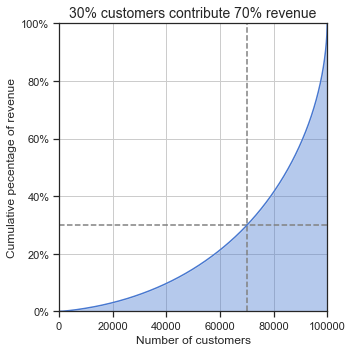

In [10]:
total_amt_cols = ['total_amt_6', 'total_amt_7', 'total_amt_8']
avg_total_amt = telecom[total_amt_cols].mean(axis=1)
rev = avg_total_amt.sort_values().reset_index(drop=True)
rev_pct = rev.cumsum()
rev_pct /= rev_pct.iloc[-1]
pct = rev_pct.quantile(0.7)

fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
              
ax.plot(rev_pct)
ax.fill_between(rev_pct.index, rev_pct.values, alpha=0.4)
ax.vlines(x=70000, ymax=1, ymin=0, colors="gray", linestyles="--")
ax.hlines(y=pct, xmax=100000, xmin=0, colors="gray", linestyles="--")

ax.set_title(
    '30% customers contribute {:.0%} revenue'.format(1 - pct), 
    fontsize=14,
)
ax.set_ylabel('Cumulative pecentage of revenue')
ax.set_xlabel('Number of customers')
ax.set_ylim(0, 1)
ax.set_xlim(0, 100000)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid()

30% of customers contribute about 70% of the renvenue. Therefore, we should filter out these high-value customers and train our model based on them.

In [11]:
highvalue = telecom[(telecom['total_amt_6'] > telecom['total_amt_6'].quantile(0.7)) |
                    (telecom['total_amt_7'] > telecom['total_amt_7'].quantile(0.7)) |
                    (telecom['total_amt_8'] > telecom['total_amt_8'].quantile(0.7))].copy()
highvalue.shape

(46145, 232)

## Define Target Variable (Churn) <a class="anchor" id="define-churn"></a>

We have data from June to September.

**Definition of churn**: The churn customers don't have incoming and outgoing calls, and don't use the Internet data in September.

We have four features related to customers usage of calls and the Internet.
1. total_ic_mou_9: total incoming call time in minutes in September
2. total_og_mou_9: total outgoing call time in minutes in September
3. vol_2g_mb_9: total 2G data in MB in September
4. vol_3g_mb_9: total 3G data in MB in September

In [12]:
highvalue[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.0
1,188.04,72.11,0.0,0.0
3,305.38,362.54,0.0,0.0
6,2572.49,65.91,0.0,0.0
7,0.00,0.00,0.0,0.0


In [13]:
highvalue['churn_flag'] = np.where(
    (highvalue['total_ic_mou_9'] == 0.00) & (highvalue['total_og_mou_9'] == 0.00)
    & (highvalue['vol_2g_mb_9'] == 0.00) & (highvalue['vol_3g_mb_9'] == 0.00),
    1, 0)
highvalue['churn_flag'].value_counts()

0    41940
1     4205
Name: churn_flag, dtype: int64

In [14]:
churn_count = highvalue['churn_flag'].value_counts()
print('{} customers stayed (label 1) \n{} customers churned (label 0)'.format(churn_count.iloc[0], churn_count.iloc[1]))

41940 customers stayed (label 1) 
4205 customers churned (label 0)


The percentage of churn (label 1) and stayed (label 0) customers (Unbalanced dataset).

In [15]:
highvalue['churn_flag'].value_counts() * 100/highvalue.shape[0]

0    90.88742
1     9.11258
Name: churn_flag, dtype: float64

filter out data in September because we only use data from pervious months to predict.

In [16]:
highvalue = highvalue.drop(highvalue.filter(regex='_9|sep', axis = 1).columns, axis=1)
highvalue.shape

(46145, 178)

## Filter Out Useless Features: Single Unique Values & Mobile Number <a class="anchor" id="filter-single"></a>

In [17]:
unique_stats = highvalue.nunique().to_frame().reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
unique_stats[unique_stats['nunique'] == 1]

,feature,nunique
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
5,last_date_of_month_6,1
6,last_date_of_month_7,1
7,last_date_of_month_8,1
47,std_og_t2c_mou_6,1
48,std_og_t2c_mou_7,1
49,std_og_t2c_mou_8,1


In [18]:
single_cols = unique_stats.loc[unique_stats['nunique'] == 1, 'feature']
highvalue.drop(columns=single_cols, inplace=True)
highvalue.shape

(46145, 165)

In [19]:
highvalue.drop(columns=['mobile_number'], inplace=True)

## Missing Values <a class="anchor" id="missing-values"></a>

The missing value percentage for each feature

In [20]:
round((highvalue.isna().sum()*100 / highvalue.shape[0]), 2).sort_values(ascending=False)

arpu_2g_6                   55.20
date_of_last_rech_data_6    55.20
count_rech_3g_6             55.20
night_pck_user_6            55.20
count_rech_2g_6             55.20
max_rech_data_6             55.20
total_rech_data_6           55.20
av_rech_amt_data_6          55.20
fb_user_6                   55.20
total_data_rech_amt_6       55.20
arpu_3g_6                   55.20
date_of_last_rech_data_7    53.86
max_rech_data_7             53.86
count_rech_3g_7             53.86
av_rech_amt_data_7          53.86
count_rech_2g_7             53.86
total_data_rech_amt_7       53.86
arpu_2g_7                   53.86
total_rech_data_7           53.86
fb_user_7                   53.86
arpu_3g_7                   53.86
night_pck_user_7            53.86
arpu_3g_8                   52.40
arpu_2g_8                   52.40
night_pck_user_8            52.40
av_rech_amt_data_8          52.40
max_rech_data_8             52.40
count_rech_3g_8             52.40
count_rech_2g_8             52.40
total_rech_dat

### Methodologies

There are two possibilities why this feature have missing values:
1. **Customers have no transaction**, so we need to assign 0 to this feature 
2. **Our data collection system fail to collect the data**, so we can use mean, median or EM algorithm to fill it

### 1. Missing because customers have no transaction

Let's look at `arpu_2g_6`, which has highest missing rate. This feature means average revenue per user for 2g network data usage in June.

Let's check what is the actual reason for missing.

Firstly, get the data-recharge-related columns

In [21]:
rech_data_cols = ['date_of_last_rech_data', 'total_rech_data', 'max_rech_data', 
                  'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 
                  'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 
                  'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 
                  'sachet_3g', 'fb_user']

rech_cols = ['total_rech_num', 'total_rech_amt', 'max_rech_amt',
             'date_of_last_rech', 'last_day_rech_amt', 'date_of_last_rech_data',
             'total_rech_data', 'max_rech_data', 'count_rech_2g',
             'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb',
             'arpu_3g', 'arpu_2g', 'night_pck_user', 'monthly_2g',
             'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user']

In [22]:
highvalue[highvalue['arpu_2g_6'].isna()][list(map(lambda ele : ele + '_6', rech_data_cols))].nunique()

date_of_last_rech_data_6    0
total_rech_data_6           0
max_rech_data_6             0
count_rech_2g_6             0
count_rech_3g_6             0
av_rech_amt_data_6          0
vol_2g_mb_6                 1
vol_3g_mb_6                 1
arpu_3g_6                   0
arpu_2g_6                   0
night_pck_user_6            0
monthly_2g_6                1
sachet_2g_6                 1
monthly_3g_6                1
sachet_3g_6                 1
fb_user_6                   0
dtype: int64

Observation 1: For sub-data where `arpu_2g_6` is NaN in the rows, the `arpu_2g_6` related columns only have 0 or 1 kind of values.

In [23]:
highvalue[highvalue['arpu_2g_6'].isna()][list(map(lambda ele : ele + '_6', rech_data_cols))].head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN


Observation 2: For sub-data where `arpu_2g_6` is NaN in the rows, the `arpu_2g_6` related columns have value NaN or 0.0

Conclusion from Observation 1 & 2:
For sub-data where `arpu_2g_6` is NaN in the rows, all `arpu_2g_6` related data have value NaN or 0, **which means customers don't have transaction records for data usage.**

So fill all these columns with value 0.

In [24]:
fill_cols = ['fb_user_6', 'arpu_3g_6', 'max_rech_data_6', 'arpu_2g_6', 
             'total_rech_data_6', 'total_data_rech_amt_6', 'av_rech_amt_data_6', 
             'night_pck_user_6', 'count_rech_2g_6', 'date_of_last_rech_data_6',
             'count_rech_3g_6']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

fb_user_6                   0
arpu_3g_6                   0
max_rech_data_6             0
arpu_2g_6                   0
total_rech_data_6           0
total_data_rech_amt_6       0
av_rech_amt_data_6          0
night_pck_user_6            0
count_rech_2g_6             0
date_of_last_rech_data_6    0
count_rech_3g_6             0
dtype: int64

Similarly, we can use this method to fill other columns with same missing reason (no transaction records)

In [25]:
fill_cols = ['av_rech_amt_data_8', 'arpu_2g_8', 'date_of_last_rech_data_8',
             'total_data_rech_amt_8', 'total_rech_data_8', 'arpu_3g_8',
             'max_rech_data_8', 'night_pck_user_8', 'count_rech_2g_8', 
             'count_rech_3g_8', 'fb_user_8']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [26]:
fill_cols = ['total_rech_data_7', 'max_rech_data_7', 'date_of_last_rech_data_7', 
             'night_pck_user_7', 'fb_user_7', 'count_rech_3g_7', 'arpu_2g_7', 
             'total_data_rech_amt_7', 'av_rech_amt_data_7', 'arpu_3g_7',
             'count_rech_2g_7']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [27]:
fill_cols = ['loc_og_mou_8', 'std_ic_t2t_mou_8', 'loc_og_t2f_mou_8', 
             'isd_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
             'ic_others_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
             'std_og_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8',
             'isd_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'og_others_8',
             'loc_ic_t2f_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2m_mou_8',
             'loc_ic_t2m_mou_8', 'offnet_mou_8', 'spl_ic_mou_8',
             'roam_og_mou_8', 'std_ic_t2m_mou_8', 'onnet_mou_8',
             'std_ic_mou_8', 'roam_ic_mou_8']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [28]:
fill_cols = ['std_ic_mou_7', 'loc_og_t2t_mou_7', 'std_og_t2f_mou_7', 
             'isd_og_mou_7', 'std_og_t2m_mou_7', 'spl_og_mou_7',
             'std_og_t2t_mou_7', 'og_others_7', 'loc_og_mou_7',
             'loc_ic_t2t_mou_7', 'loc_og_t2c_mou_7', 'loc_ic_t2m_mou_7',
             'loc_og_t2f_mou_7', 'loc_ic_t2f_mou_7', 'loc_og_t2m_mou_7',
             'loc_ic_mou_7', 'std_og_mou_7', 'onnet_mou_7', 
             'roam_og_mou_7', 'std_ic_t2m_mou_7', 'spl_ic_mou_7', 
             'roam_ic_mou_7', 'ic_others_7', 'std_ic_t2f_mou_7', 
             'offnet_mou_7', 'std_ic_t2t_mou_7', 'isd_ic_mou_7']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [29]:
fill_cols = ['std_ic_t2t_mou_6', 'std_ic_mou_6', 'isd_og_mou_6', 
             'spl_og_mou_6', 'isd_ic_mou_6', 'loc_ic_t2t_mou_6',
             'og_others_6', 'std_ic_t2f_mou_6', 'ic_others_6',
             'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2m_mou_6',
             'std_og_mou_6', 'loc_ic_mou_6', 'spl_ic_mou_6',
             'roam_ic_mou_6', 'onnet_mou_6', 'loc_og_t2t_mou_6', 
             'loc_og_t2f_mou_6', 'roam_og_mou_6', 'loc_og_t2c_mou_6', 
             'loc_og_mou_6', 'offnet_mou_6', 'loc_og_t2m_mou_6', 
             'std_og_t2t_mou_6', 'std_og_t2f_mou_6', 'std_og_t2m_mou_6']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [30]:
highvalue['date_of_last_rech_7'].fillna(0, inplace=True)

In [31]:
highvalue['date_of_last_rech_6'].fillna(0, inplace=True)

### 2. Missing because data collection system fail to collect the data

This situation happened in `rech_8_cols`

In [32]:
rech_8_cols = highvalue.filter(regex='rech.*_8').columns

In [33]:
highvalue[highvalue['date_of_last_rech_8'].isna()][rech_8_cols].nunique()

total_rech_num_8            1
total_rech_amt_8            1
max_rech_amt_8              1
date_of_last_rech_8         0
last_day_rech_amt_8         1
date_of_last_rech_data_8    2
total_rech_data_8           2
max_rech_data_8             2
count_rech_2g_8             2
count_rech_3g_8             1
av_rech_amt_data_8          2
total_data_rech_amt_8       2
dtype: int64

Because `date_of_last_rech_data_8` has 2 different values, let's check how the data looks like when `date_of_last_rech_data_8` is not 0.

In [34]:
non_zero_row = highvalue.loc[highvalue['date_of_last_rech_8'].isna() & 
                             (highvalue['date_of_last_rech_data_8'] != 0), 
                             rech_8_cols]
non_zero_row

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rech_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,total_data_rech_amt_8
25540,0,0,0,NaN,0,8/12/2014,1.0,154.0,1.0,0.0,154.0,154.0


As we can seen above, there is only one row where `date_of_last_rech_data_8` is not 0.

We have over 30,000 rows of data thus we can simply drop this row.

In [35]:
highvalue.drop(non_zero_row.index, inplace=True)

In [36]:
zero_row = highvalue.loc[highvalue['date_of_last_rech_8'].isna() & 
                         (highvalue['date_of_last_rech_data_8'] == 0), 
                         rech_8_cols]
zero_row.nunique()

total_rech_num_8            1
total_rech_amt_8            1
max_rech_amt_8              1
date_of_last_rech_8         0
last_day_rech_amt_8         1
date_of_last_rech_data_8    1
total_rech_data_8           1
max_rech_data_8             1
count_rech_2g_8             1
count_rech_3g_8             1
av_rech_amt_data_8          1
total_data_rech_amt_8       1
dtype: int64

fill other `date_of_last_rech_8` as 0

In [37]:
highvalue['date_of_last_rech_8'].fillna(0, inplace=True)
highvalue['date_of_last_rech_8'].isna().sum()

0

### check whether we still have any missing values

In [38]:
highvalue.isna().values.any()

False

## Derived Features <a class="anchor" id="derive-features"></a>

### 1. Date features

Change date columns to `datetime` type

In [39]:
date_cols = highvalue.filter(regex='date').columns
for col in date_cols:
    highvalue[col] = pd.to_datetime(highvalue[col])
highvalue[date_cols].info(verbose=True, null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46144 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_of_last_rech_6       46144 non-null  datetime64[ns]
 1   date_of_last_rech_7       46144 non-null  datetime64[ns]
 2   date_of_last_rech_8       46144 non-null  datetime64[ns]
 3   date_of_last_rech_data_6  46144 non-null  datetime64[ns]
 4   date_of_last_rech_data_7  46144 non-null  datetime64[ns]
 5   date_of_last_rech_data_8  46144 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 2.5 MB


Derive 2 features from date:
1. `dayofweek` of the date, e.g. monday, tuesday
2. `partofmonth` of the date, e.g. early (of the month), middle, late

In [40]:
def na_category(row, original_col, c_num, func):
    # if date equal to 1970-01-01, which means date is nan
    # then our customers didn't take any actions
    if row[original_col] == dt.datetime(1970, 1, 1):
        return c_num
    # otherwise, the action took at this time
    return func(row[original_col])

In [41]:
for col in date_cols:
    highvalue['dayofweek_' + col] = highvalue.apply(
        na_category, 
        axis=1, 
        args=(col, 7, lambda x : x.dayofweek,))
    highvalue['dayofweek_' + col] = highvalue['dayofweek_' + col].map({0: 'monday',
                                                                       1: 'tuesday',
                                                                       2: 'wednesday',
                                                                       3: 'thursday',
                                                                       4: 'friday',
                                                                       5: 'saturday',
                                                                       6: 'sunday',
                                                                       7: 'no_rech'})
    highvalue['partofmonth_' + col] = highvalue.apply(
        na_category,
        axis=1,
        args=(col, 3, lambda x : min(int((x.day - 1) / 10), 2),))
    highvalue['partofmonth_' + col] = highvalue['partofmonth_' + col].map({0: 'early',
                                                                           1: 'middle',
                                                                           2: 'late',
                                                                           3: 'no_rech'})

In [42]:
highvalue.filter(regex='(dayofweek|partofmonth)').head()

,dayofweek_date_of_last_rech_6,partofmonth_date_of_last_rech_6,dayofweek_date_of_last_rech_7,partofmonth_date_of_last_rech_7,dayofweek_date_of_last_rech_8,partofmonth_date_of_last_rech_8,dayofweek_date_of_last_rech_data_6,partofmonth_date_of_last_rech_data_6,dayofweek_date_of_last_rech_data_7,partofmonth_date_of_last_rech_data_7,dayofweek_date_of_last_rech_data_8,partofmonth_date_of_last_rech_data_8
0,saturday,late,wednesday,middle,friday,early,saturday,late,wednesday,middle,friday,early
1,sunday,late,thursday,late,thursday,late,no_rech,no_rech,friday,late,sunday,early
3,saturday,late,thursday,late,sunday,late,no_rech,no_rech,no_rech,no_rech,no_rech,no_rech
6,saturday,late,thursday,late,thursday,late,no_rech,no_rech,no_rech,no_rech,no_rech,no_rech
7,friday,late,friday,late,tuesday,late,no_rech,no_rech,no_rech,no_rech,no_rech,no_rech


one-hot encoding dummy variable

In [43]:
highvalue = pd.get_dummies(highvalue, columns=list(map(lambda x : 'dayofweek_' + x, date_cols)))
highvalue = pd.get_dummies(highvalue, columns=list(map(lambda x : 'partofmonth_' + x, date_cols)))

In [44]:
highvalue.filter(regex='(dayofweek|partofmonth)').head()

,dayofweek_date_of_last_rech_6_friday,dayofweek_date_of_last_rech_6_monday,dayofweek_date_of_last_rech_6_no_rech,dayofweek_date_of_last_rech_6_saturday,dayofweek_date_of_last_rech_6_sunday,dayofweek_date_of_last_rech_6_thursday,dayofweek_date_of_last_rech_6_tuesday,dayofweek_date_of_last_rech_6_wednesday,dayofweek_date_of_last_rech_7_friday,dayofweek_date_of_last_rech_7_monday,dayofweek_date_of_last_rech_7_no_rech,dayofweek_date_of_last_rech_7_saturday,dayofweek_date_of_last_rech_7_sunday,dayofweek_date_of_last_rech_7_thursday,dayofweek_date_of_last_rech_7_tuesday,dayofweek_date_of_last_rech_7_wednesday,dayofweek_date_of_last_rech_8_friday,dayofweek_date_of_last_rech_8_monday,dayofweek_date_of_last_rech_8_no_rech,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_8_thursday,dayofweek_date_of_last_rech_8_tuesday,dayofweek_date_of_last_rech_8_wednesday,dayofweek_date_of_last_rech_data_6_friday,dayofweek_date_of_last_rech_data_6_monday,dayofweek_date_of_last_rech_data_6_no_rech,dayofweek_date_of_last_rech_data_6_saturday,dayofweek_date_of_last_rech_data_6_sunday,dayofweek_date_of_last_rech_data_6_thursday,dayofweek_date_of_last_rech_data_6_tuesday,dayofweek_date_of_last_rech_data_6_wednesday,dayofweek_date_of_last_rech_data_7_friday,dayofweek_date_of_last_rech_data_7_monday,dayofweek_date_of_last_rech_data_7_no_rech,dayofweek_date_of_last_rech_data_7_saturday,dayofweek_date_of_last_rech_data_7_sunday,dayofweek_date_of_last_rech_data_7_thursday,dayofweek_date_of_last_rech_data_7_tuesday,dayofweek_date_of_last_rech_data_7_wednesday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_no_rech,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_6_early,partofmonth_date_of_last_rech_6_late,partofmonth_date_of_last_rech_6_middle,partofmonth_date_of_last_rech_6_no_rech,partofmonth_date_of_last_rech_7_early,partofmonth_date_of_last_rech_7_late,partofmonth_date_of_last_rech_7_middle,partofmonth_date_of_last_rech_7_no_rech,partofmonth_date_of_last_rech_8_early,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_8_middle,partofmonth_date_of_last_rech_8_no_rech,partofmonth_date_of_last_rech_data_6_early,partofmonth_date_of_last_rech_data_6_late,partofmonth_date_of_last_rech_data_6_middle,partofmonth_date_of_last_rech_data_6_no_rech,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_7_no_rech,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_middle,partofmonth_date_of_last_rech_data_8_no_rech
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1


drop original date cols

In [45]:
highvalue.drop(date_cols, axis=1, inplace=True)

### 2. Month-to-month change features

These features are calculated by the data from the last month and the current month. Basically, it's xxx_lastmonth / xxx_thismonth. 

Take `arpu` (Average Revenue Per User) for example:

$$
arpu\_7over6 = \frac{arpu\_7}{arpu\_6}
$$

However, **we may have denominator as 0 or negative values**. So we slightly change the formula:

$$
arpu\_7over6 = \frac{arpu\_7 + (-1)^{1\{arpu\_7 < 0\}}}{arpu\_6 + (-1)^{1\{arpu\_6 < 0\}}}
$$

Note that $1\{arpu\_7 < 0\}$ equals 1 if `arpu_7` < 0 otherwise it equals 0.

Now, to define a python function for this formula

In [46]:
def gen_over_cols(cols):
    for col in set(map(lambda x : x[:-2], cols)):
        adjust_6 = highvalue[col + '_6'].apply(lambda x : x + (1 if x >= 0 else -1))
        adjust_7 = highvalue[col + '_7'].apply(lambda x : x + (1 if x >= 0 else -1))
        adjust_8 = highvalue[col + '_8'].apply(lambda x : x + (1 if x >= 0 else -1))
        
        highvalue[col + '_7over6'] = (adjust_7 / adjust_6)
        highvalue[col + '_8over7'] = (adjust_8 / adjust_7)

Now let's derive month-to-month change data for usage and recharge columns

In [47]:
mou_cols = highvalue.filter(regex='mou').columns
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [48]:
gen_over_cols(mou_cols)

highvalue[highvalue.filter(regex='mou.*(7over6|8over7)').columns].head()

,loc_og_t2f_mou_7over6,loc_og_t2f_mou_8over7,loc_og_t2t_mou_7over6,loc_og_t2t_mou_8over7,loc_ic_mou_7over6,loc_ic_mou_8over7,isd_og_mou_7over6,isd_og_mou_8over7,roam_ic_mou_7over6,roam_ic_mou_8over7,isd_ic_mou_7over6,isd_ic_mou_8over7,loc_ic_t2m_mou_7over6,loc_ic_t2m_mou_8over7,spl_ic_mou_7over6,spl_ic_mou_8over7,std_ic_t2m_mou_7over6,std_ic_t2m_mou_8over7,loc_og_t2c_mou_7over6,loc_og_t2c_mou_8over7,std_ic_mou_7over6,std_ic_mou_8over7,loc_ic_t2t_mou_7over6,loc_ic_t2t_mou_8over7,std_og_t2t_mou_7over6,std_og_t2t_mou_8over7,std_og_t2m_mou_7over6,std_og_t2m_mou_8over7,std_og_t2f_mou_7over6,std_og_t2f_mou_8over7,loc_ic_t2f_mou_7over6,loc_ic_t2f_mou_8over7,total_ic_mou_7over6,total_ic_mou_8over7,offnet_mou_7over6,offnet_mou_8over7,total_og_mou_7over6,total_og_mou_8over7,roam_og_mou_7over6,roam_og_mou_8over7,spl_og_mou_7over6,spl_og_mou_8over7,loc_og_t2m_mou_7over6,loc_og_t2m_mou_8over7,std_og_mou_7over6,std_og_mou_8over7,std_ic_t2t_mou_7over6,std_ic_t2t_mou_8over7,std_ic_t2f_mou_7over6,std_ic_t2f_mou_8over7,loc_og_mou_7over6,loc_og_mou_8over7,onnet_mou_7over6,onnet_mou_8over7
0,1.000000,1.000000,1.000000,1.000000,1.000000,6.440000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.130000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.160000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.150000,1.000000,6.440000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,3.036977,0.114876,5.237929,3.890811,1.00,1.000000,1.000000,1.000000,0.353357,1.000000,3.591991,5.673094,1.000000,1.0,0.144928,13.490000,3.910000,0.255754,0.144928,15.840000,11.842912,0.978001,4.154472,0.195695,1.460000,0.773973,1.000000,1.00000,9.930000,0.464250,3.781171,4.031930,6.023895,3.032130,4.345921,1.745892,1.000000,1.000000,4.301056,0.563242,6.150280,3.806343,4.536585,0.202509,1.000000,3.350000,1.000000,1.000000,4.163506,1.983631,3.173238,0.108936
3,0.567010,3.581818,0.479513,0.324211,0.480169,0.436806,1.00,1.000000,55.860000,0.812388,1.000000,1.000000,0.569850,0.324836,0.628931,1.0,16.978541,0.150152,1.000000,1.000000,2.256012,0.056032,0.332594,0.430887,0.583548,18.286973,0.684211,2.758242,1.000000,1.00000,0.480746,0.741901,0.774192,0.248748,0.884965,0.660667,0.607903,2.591226,29.090000,1.376418,0.083612,19.090000,0.776630,0.278589,0.583196,16.852524,1.516187,0.014828,0.458716,1.000000,0.650329,0.325785,0.548905,5.632425
6,0.087873,1.000000,0.639039,1.675864,0.840133,1.211175,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.353789,0.787904,1.000000,1.0,0.736402,2.045455,0.900901,1.000000,0.736402,2.045455,0.768181,1.328695,1.000000,1.510000,1.530000,8.137255,1.000000,1.00000,1.115348,0.148164,0.840167,1.211871,0.190498,1.852707,0.286205,1.771631,1.000000,1.000000,1.378378,0.653595,0.196304,1.642124,1.530000,8.470588,1.000000,1.000000,1.000000,1.000000,0.283110,1.665400,0.639039,1.687161
7,0.889276,0.965978,0.618057,1.274861,0.830605,0.530668,1.18,9.330508,2.001741,0.946361,5.075163,2.098519,1.017981,0.549193,0.826446,1.0,1.384574,1.112040,1.000000,1.000000,0.958907,1.119830,0.562394,0.851173,4.583019,0.535611,0.643741,1.530525,2.751958,0.83871,0.668974,0.395569,0.890957,0.768711,1.250270,0.575384,1.249135,0.575446,0.549313,2.874172,0.181818,7.500000,1.448115,0.364155,1.230844,1.035461,0.338612,2.446610,0.662531,0.658627,1.264085,0.480062,0.946295,0.957076


In [49]:
other_cols = highvalue.filter(regex='other').columns
other_cols

Index(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8'],
      dtype='object')

In [50]:
gen_over_cols(other_cols)

highvalue[highvalue.filter(regex='other.*(7over6|8over7)').columns].head()

,ic_others_7over6,ic_others_8over7,og_others_7over6,og_others_8over7
0,1.000000,1.000000,1.0,1.0
1,1.000000,1.000000,1.0,1.0
3,1.000000,1.000000,1.0,1.0
6,1.423423,0.810127,1.0,1.0
7,0.967145,0.996912,1.0,1.0


In [51]:
data_cols = highvalue.filter(regex='(2g|3g)').columns
data_cols

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'],
      dtype='object')

In [52]:
gen_over_cols(data_cols)

highvalue[highvalue.filter(regex='(2g|3g).*(7over6|8over7)').columns].head()

,vol_3g_mb_7over6,vol_3g_mb_8over7,vol_2g_mb_7over6,vol_2g_mb_8over7,monthly_2g_7over6,monthly_2g_8over7,sachet_2g_7over6,sachet_2g_8over7,monthly_3g_7over6,monthly_3g_8over7,arpu_3g_7over6,arpu_3g_8over7,sachet_3g_7over6,sachet_3g_8over7,arpu_2g_7over6,arpu_2g_8over7,count_rech_2g_7over6,count_rech_2g_8over7,count_rech_3g_7over6,count_rech_3g_8over7,vbc_3g_7over6,vbc_3g_8over7
0,1.79449,0.728848,0.074526,2.909483,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.000000,1.0,1.0,1.0,1.0,0.009785,31.400000
1,1.00000,1.000000,109.070000,3.359952,2.0,0.5,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,29.61,0.290442,2.0,1.5,1.0,1.0,1.000000,1.000000
3,1.00000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000
6,1.00000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000
7,1.00000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.000000,1.0,1.0,1.0,1.0,1.032421,2.882237


In [53]:
arpu_cols = highvalue.filter(regex='arpu_(?!(2g|3g))').columns
arpu_cols

Index(['arpu_6', 'arpu_7', 'arpu_8'], dtype='object')

In [54]:
gen_over_cols(arpu_cols)

highvalue[highvalue.filter(regex='arpu.*(7over6|8over7)').columns].head()

,arpu_3g_7over6,arpu_3g_8over7,arpu_2g_7over6,arpu_2g_8over7,arpu_7over6,arpu_8over7
0,1.0,1.0,1.00,1.000000,1.087865,0.995306
1,1.0,1.0,29.61,0.290442,10.159900,0.756362
3,1.0,1.0,1.00,1.000000,1.133868,2.019238
6,1.0,1.0,1.00,1.000000,0.445799,1.335987
7,1.0,1.0,1.00,1.000000,1.262264,2.348506


sort columns by column names to avoid random dropping issue

In [55]:
col_list = list(highvalue.columns)
col_list.sort(reverse=True)
highvalue = highvalue[col_list]
highvalue.head()

,vol_3g_mb_8over7,vol_3g_mb_8,vol_3g_mb_7over6,vol_3g_mb_7,vol_3g_mb_6,vol_2g_mb_8over7,vol_2g_mb_8,vol_2g_mb_7over6,vol_2g_mb_7,vol_2g_mb_6,vbc_3g_8over7,vbc_3g_8,vbc_3g_7over6,vbc_3g_7,vbc_3g_6,total_rech_num_8,total_rech_num_7,total_rech_num_6,total_rech_data_8,total_rech_data_7,total_rech_data_6,total_rech_amt_8,total_rech_amt_7,total_rech_amt_6,total_og_mou_8over7,total_og_mou_8,total_og_mou_7over6,total_og_mou_7,total_og_mou_6,total_ic_mou_8over7,total_ic_mou_8,total_ic_mou_7over6,total_ic_mou_7,total_ic_mou_6,total_data_rech_amt_8,total_data_rech_amt_7,total_data_rech_amt_6,total_amt_8,total_amt_7,total_amt_6,std_og_t2t_mou_8over7,std_og_t2t_mou_8,std_og_t2t_mou_7over6,std_og_t2t_mou_7,std_og_t2t_mou_6,std_og_t2m_mou_8over7,std_og_t2m_mou_8,std_og_t2m_mou_7over6,std_og_t2m_mou_7,std_og_t2m_mou_6,std_og_t2f_mou_8over7,std_og_t2f_mou_8,std_og_t2f_mou_7over6,std_og_t2f_mou_7,std_og_t2f_mou_6,std_og_mou_8over7,std_og_mou_8,std_og_mou_7over6,std_og_mou_7,std_og_mou_6,std_ic_t2t_mou_8over7,std_ic_t2t_mou_8,std_ic_t2t_mou_7over6,std_ic_t2t_mou_7,std_ic_t2t_mou_6,std_ic_t2m_mou_8over7,std_ic_t2m_mou_8,std_ic_t2m_mou_7over6,std_ic_t2m_mou_7,std_ic_t2m_mou_6,std_ic_t2f_mou_8over7,std_ic_t2f_mou_8,std_ic_t2f_mou_7over6,std_ic_t2f_mou_7,std_ic_t2f_mou_6,std_ic_mou_8over7,std_ic_mou_8,std_ic_mou_7over6,std_ic_mou_7,std_ic_mou_6,spl_og_mou_8over7,spl_og_mou_8,spl_og_mou_7over6,spl_og_mou_7,spl_og_mou_6,spl_ic_mou_8over7,spl_ic_mou_8,spl_ic_mou_7over6,spl_ic_mou_7,spl_ic_mou_6,sachet_3g_8over7,sachet_3g_8,sachet_3g_7over6,sachet_3g_7,sachet_3g_6,sachet_2g_8over7,sachet_2g_8,sachet_2g_7over6,sachet_2g_7,sachet_2g_6,roam_og_mou_8over7,roam_og_mou_8,roam_og_mou_7over6,roam_og_mou_7,roam_og_mou_6,roam_ic_mou_8over7,roam_ic_mou_8,roam_ic_mou_7over6,roam_ic_mou_7,roam_ic_mou_6,partofmonth_date_of_last_rech_data_8_no_rech,partofmonth_date_of_last_rech_data_8_middle,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_7_no_rech,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_6_no_rech,partofmonth_date_of_last_rech_data_6_middle,partofmonth_date_of_last_rech_data_6_late,partofmonth_date_of_last_rech_data_6_early,partofmonth_date_of_last_rech_8_no_rech,partofmonth_date_of_last_rech_8_middle,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_8_early,partofmonth_date_of_last_rech_7_no_rech,partofmonth_date_of_last_rech_7_middle,partofmonth_date_of_last_rech_7_late,partofmonth_date_of_last_rech_7_early,partofmonth_date_of_last_rech_6_no_rech,partofmonth_date_of_last_rech_6_middle,partofmonth_date_of_last_rech_6_late,partofmonth_date_of_last_rech_6_early,onnet_mou_8over7,onnet_mou_8,onnet_mou_7over6,onnet_mou_7,onnet_mou_6,og_others_8over7,og_others_8,og_others_7over6,og_others_7,og_others_6,offnet_mou_8over7,offnet_mou_8,offnet_mou_7over6,offnet_mou_7,offnet_mou_6,night_pck_user_8,night_pck_user_7,night_pck_user_6,monthly_3g_8over7,monthly_3g_8,monthly_3g_7over6,monthly_3g_7,monthly_3g_6,monthly_2g_8over7,monthly_2g_8,monthly_2g_7over6,monthly_2g_7,monthly_2g_6,max_rech_data_8,max_rech_data_7,max_rech_data_6,max_rech_amt_8,max_rech_amt_7,max_rech_amt_6,loc_og_t2t_mou_8over7,loc_og_t2t_mou_8,loc_og_t2t_mou_7over6,loc_og_t2t_mou_7,loc_og_t2t_mou_6,loc_og_t2m_mou_8over7,loc_og_t2m_mou_8,loc_og_t2m_mou_7over6,loc_og_t2m_mou_7,loc_og_t2m_mou_6,loc_og_t2f_mou_8over7,loc_og_t2f_mou_8,loc_og_t2f_mou_7over6,loc_og_t2f_mou_7,loc_og_t2f_mou_6,loc_og_t2c_mou_8over7,loc_og_t2c_mou_8,loc_og_t2c_mou_7over6,loc_og_t2c_mou_7,loc_og_t2c_mou_6,loc_og_mou_8over7,loc_og_mou_8,loc_og_mou_7over6,loc_og_mou_7,loc_og_mou_6,loc_ic_t2t_mou_8over7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_7over6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_6,loc_ic_t2m_mou_8over7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_7over6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_6,loc_ic_t2f_mou_8over7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_7over6,loc_ic_

In [56]:
highvalue.shape

(46144, 312)

# Statistical Analysis<a class="anchor" id="statistical-analysis"></a>

The revenue of Operator T is from two parts, 
1. calling and 
2. Internet data usage, 

In [57]:
def data_month_sum(df, col_prefixes):
    month_list = ['Jun.', 'Jul.', 'Aug.']
    results = pd.DataFrame(index=month_list)
    for prefix in col_prefixes:
        cols = [prefix + '_' + str(month) for month in range(6, 9)]
        sum_values = df[cols].sum()
        sum_values.name = prefix
        sum_values.index = month_list
        results = pd.concat([results, sum_values], axis=1)
    return results

The calling part revenue `total_rech_amt` is about 2 times higher than Internet data part `total_data_rech_amt`.

In [58]:
busi_data = data_month_sum(highvalue, ['total_rech_amt', 'total_data_rech_amt'])
busi_data.div(busi_data.sum(axis=1), axis=0)

,total_rech_amt,total_data_rech_amt
Jun.,0.626288,0.373712
Jul.,0.592049,0.407951
Aug.,0.585533,0.414467


For the calling services, the major calls are local calls and STD calls, which account for more than 90% of the total voice call service time.

In [59]:
busi_data = data_month_sum(
    highvalue, 
    ['std_og_mou', 'loc_og_mou', 'spl_og_mou', 
     'roam_og_mou', 'isd_og_mou', 'og_others'],
)
busi_data.div(busi_data.sum(axis=1), axis=0)

,std_og_mou,loc_og_mou,spl_og_mou,roam_og_mou,isd_og_mou,og_others
Jun.,0.538957,0.404313,0.009919,0.042679,0.003031,0.001101
Jul.,0.559607,0.394589,0.012174,0.030698,0.002868,0.000064
Aug.,0.554325,0.397405,0.012736,0.032448,0.002982,0.000104


In [60]:
busi_data = data_month_sum(
    highvalue, 
    ['std_ic_mou', 'loc_ic_mou', 'spl_ic_mou', 
     'roam_ic_mou', 'isd_ic_mou', 'ic_others'],
)
busi_data.div(busi_data.sum(axis=1), axis=0)

,std_ic_mou,loc_ic_mou,spl_ic_mou,roam_ic_mou,isd_ic_mou,ic_others
Jun.,0.154001,0.754601,0.000219,0.051622,0.035782,0.003776
Jul.,0.160086,0.756930,0.000083,0.039145,0.039089,0.004667
Aug.,0.156124,0.759341,0.000120,0.040817,0.039332,0.004266


As for the data usage, the volume for 3G takes the majority approximately 73% on average.

In [61]:
busi_data = data_month_sum(highvalue, ['vol_3g_mb', 'vol_2g_mb'])
busi_data.div(busi_data.sum(axis=1), axis=0)

,vol_3g_mb,vol_2g_mb
Jun.,0.716077,0.283923
Jul.,0.731498,0.268502
Aug.,0.744677,0.255323


In [62]:
def plot_rel(prefix):
    fig, axes = plt.subplots(3, 2, sharex=True, figsize=(4, 4), tight_layout=True)

    col_list = [prefix + '_' + str(row) for row in range(6, 9)]
    col_list.append('churn_flag')
    filter_data = highvalue[col_list]
    filter_data = filter_data.loc[(filter_data.iloc[:, 0] < filter_data.iloc[:, 0].quantile(0.95)) &
                                  (filter_data.iloc[:, 1] < filter_data.iloc[:, 1].quantile(0.95)) &
                                  (filter_data.iloc[:, 2] < filter_data.iloc[:, 2].quantile(0.95))]

    for row in range(6, 9):
        for col in range(0, 2):
            xlabel = prefix + '_' + str(row)
            axes[row - 6, col].hist(
                filter_data.loc[filter_data['churn_flag'] == col, xlabel], 
                bins=20,
            )
            axes[row - 6, col].set_title('Month = ' + str(row) + ' | ' + "Churn = " + str(col))
            if row == 8:
                axes[row - 6, col].set_xlabel(prefix)
            if col == 0:
                axes[row - 6, col].set_ylabel('# instances')

    fig.suptitle('Relationship between ' + prefix + ' and churn', fontsize=14)

From June to August, the distributions of `total_rech_amt` for churned and non-churned customers becomes more different and the data in the later month could better distinguish whether consumers will churn or not. For example, the customers with high `total_rech_amt` in the last month (August) are very likely not churned customers. This pattern is similar in the variable of `loc_ic_mou`.

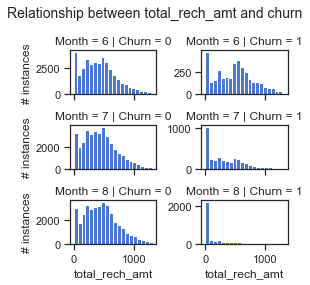

In [63]:
plot_rel('total_rech_amt')

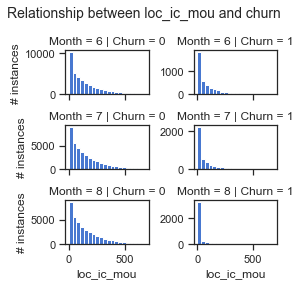

In [64]:
plot_rel('loc_ic_mou')

Above analysis explored the relationship between a set of absolute single data and churn. Another type of data, the ratio between variables, may also reflect churn. The scatter graph shows that if the usage of incoming calling (`total_ic_mou`) has a significant decrease from July to August, it means that the customer is more likely to be churned.

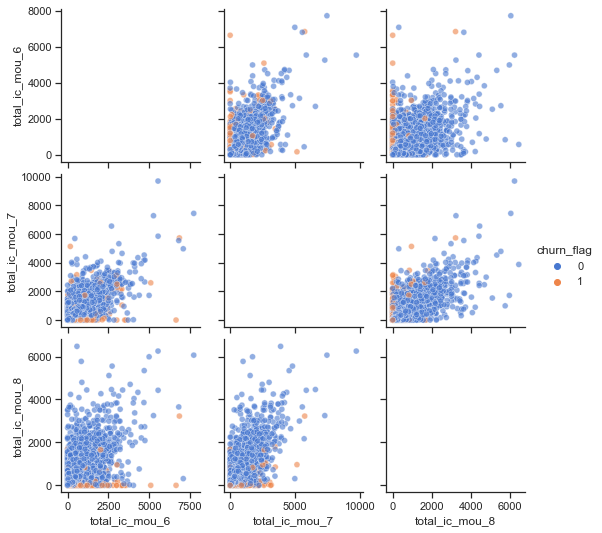

In [65]:
sns.pairplot(
    data=highvalue[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn_flag']],
    hue='churn_flag',
    diag_kind='None',
    plot_kws={'alpha': 0.6},
)
plt.show()

Text(0.5, 1.0, 'Change of total_ic_mou and churn')

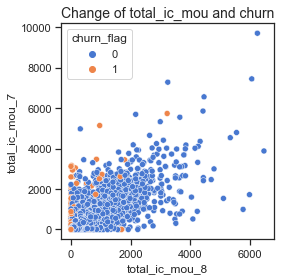

In [66]:
fig, ax = plt.subplots(figsize=(4, 4), tight_layout=True)
sns.scatterplot(data=highvalue,
                x="total_ic_mou_8",
                y="total_ic_mou_7",
                hue="churn_flag",  
               )
ax.set_title('Change of total_ic_mou and churn', fontsize=14)

In addition to revenue, calling and Internet-data related variables, the customer attribute related variables, e.g. customers’ `aon` (age on network), are also worth noticing. As figure shows, the longer customers’ `aon` is, the less likely for them to be churned.

Text(0.5, 1.0, 'Churn and age on network')

<Figure size 288x288 with 0 Axes>

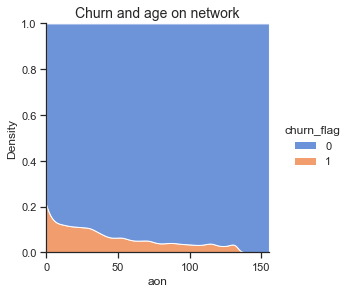

In [67]:
plt.figure(figsize=(4, 4))
sns.displot(
    data=highvalue, 
    x=highvalue['aon'] / 30,
    hue="churn_flag",
    kind="kde",
    height=4,
    multiple="fill", 
    clip=(0, None), 
    alpha=0.8,
)
plt.title('Churn and age on network', fontsize=14)

# Data Proprocessing Part 2<a class="anchor" id="data-preprocessing-2"></a> 

## Filter Out Highly Related Features <a class="anchor" id="filter-related"></a>

In [68]:
abs_corr_matrix = highvalue.corr().abs()
abs_corr_matrix = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(bool))
high_corr_indices = np.asarray(abs_corr_matrix > 0.8).nonzero()
correlated_pairs = [(abs_corr_matrix.index[x], abs_corr_matrix.columns[y]) 
                     for x, y in zip(*high_corr_indices)]
correlated_pairs

[('total_rech_data_8', 'sachet_2g_8'),
 ('total_rech_data_8', 'count_rech_2g_8'),
 ('total_rech_data_7', 'sachet_2g_7'),
 ('total_rech_data_7', 'count_rech_2g_7'),
 ('total_rech_data_6', 'sachet_2g_6'),
 ('total_rech_data_6', 'count_rech_2g_6'),
 ('total_rech_amt_8', 'arpu_8'),
 ('total_rech_amt_7', 'arpu_7'),
 ('total_rech_amt_6', 'arpu_6'),
 ('total_og_mou_8over7', 'std_og_mou_8over7'),
 ('total_og_mou_8', 'std_og_mou_8'),
 ('total_og_mou_7over6', 'std_og_mou_7over6'),
 ('total_og_mou_7', 'std_og_mou_7'),
 ('total_og_mou_6', 'std_og_mou_6'),
 ('total_ic_mou_8over7', 'loc_ic_mou_8over7'),
 ('total_ic_mou_8', 'total_ic_mou_7'),
 ('total_ic_mou_8', 'loc_ic_mou_8'),
 ('total_ic_mou_7', 'loc_ic_mou_7'),
 ('total_ic_mou_6', 'loc_ic_mou_6'),
 ('total_data_rech_amt_8', 'total_amt_8'),
 ('total_data_rech_amt_7', 'total_amt_7'),
 ('total_data_rech_amt_6', 'total_amt_6'),
 ('std_og_t2t_mou_8', 'onnet_mou_8'),
 ('std_og_t2t_mou_7over6', 'onnet_mou_7over6'),
 ('std_og_t2t_mou_7', 'onnet_mou_7'),


In [69]:
print("# Correlated pairs (where corr > 0.8): ", len(correlated_pairs))

# Correlated pairs (where corr > 0.8):  93


In [70]:
to_drop = [column for column in abs_corr_matrix.columns if any(abs_corr_matrix[column] > 0.80)]
highvalue.drop(columns=to_drop, axis=1, inplace=True)
highvalue.shape

(46144, 241)

## Prepare Train and Test Data <a class="anchor" id="train-test"></a>

### Split Train and Test Data <a class="anchor" id="split"></a>

In [71]:
from sklearn.model_selection import train_test_split

np.random.seed(rdn_seed)
train, test = train_test_split(highvalue, train_size = 0.8, random_state=rdn_seed)

In [72]:
train.shape, test.shape

((36915, 241), (9229, 241))

In [73]:
X_train=train.drop('churn_flag',axis=1)
X_test=test.drop('churn_flag',axis=1)
y_train=train['churn_flag']
y_test=test['churn_flag']

In [74]:
X_train.head()

,vol_3g_mb_8over7,vol_3g_mb_8,vol_3g_mb_7over6,vol_3g_mb_7,vol_3g_mb_6,vol_2g_mb_8over7,vol_2g_mb_8,vol_2g_mb_7over6,vol_2g_mb_7,vol_2g_mb_6,vbc_3g_8over7,vbc_3g_8,vbc_3g_7over6,vbc_3g_7,vbc_3g_6,total_rech_num_8,total_rech_num_7,total_rech_num_6,total_rech_data_8,total_rech_data_7,total_rech_data_6,total_rech_amt_8,total_rech_amt_7,total_rech_amt_6,total_og_mou_8over7,total_og_mou_8,total_og_mou_7over6,total_og_mou_7,total_og_mou_6,total_ic_mou_8over7,total_ic_mou_8,total_ic_mou_7over6,total_ic_mou_6,total_data_rech_amt_8,total_data_rech_amt_7,total_data_rech_amt_6,std_og_t2t_mou_8over7,std_og_t2t_mou_8,std_og_t2t_mou_7over6,std_og_t2t_mou_7,std_og_t2t_mou_6,std_og_t2m_mou_8over7,std_og_t2m_mou_8,std_og_t2m_mou_7over6,std_og_t2m_mou_7,std_og_t2m_mou_6,std_og_t2f_mou_8over7,std_og_t2f_mou_8,std_og_t2f_mou_7over6,std_og_t2f_mou_7,std_og_t2f_mou_6,std_ic_t2t_mou_8over7,std_ic_t2t_mou_8,std_ic_t2t_mou_7over6,std_ic_t2t_mou_7,std_ic_t2t_mou_6,std_ic_t2m_mou_8over7,std_ic_t2m_mou_8,std_ic_t2m_mou_7over6,std_ic_t2m_mou_7,std_ic_t2m_mou_6,std_ic_t2f_mou_8over7,std_ic_t2f_mou_8,std_ic_t2f_mou_7over6,std_ic_t2f_mou_7,std_ic_t2f_mou_6,std_ic_mou_8over7,spl_og_mou_8over7,spl_og_mou_8,spl_og_mou_7over6,spl_og_mou_7,spl_og_mou_6,spl_ic_mou_8over7,spl_ic_mou_7over6,spl_ic_mou_7,spl_ic_mou_6,sachet_3g_8over7,sachet_3g_8,sachet_3g_7over6,sachet_3g_7,sachet_3g_6,sachet_2g_8over7,sachet_2g_7over6,roam_og_mou_8over7,roam_og_mou_8,roam_og_mou_7over6,roam_og_mou_7,roam_og_mou_6,roam_ic_mou_8over7,roam_ic_mou_8,roam_ic_mou_7over6,roam_ic_mou_7,roam_ic_mou_6,partofmonth_date_of_last_rech_data_8_no_rech,partofmonth_date_of_last_rech_data_8_middle,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_7_no_rech,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_6_no_rech,partofmonth_date_of_last_rech_data_6_middle,partofmonth_date_of_last_rech_data_6_late,partofmonth_date_of_last_rech_data_6_early,partofmonth_date_of_last_rech_8_no_rech,partofmonth_date_of_last_rech_8_middle,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_8_early,partofmonth_date_of_last_rech_7_no_rech,partofmonth_date_of_last_rech_7_middle,partofmonth_date_of_last_rech_7_early,partofmonth_date_of_last_rech_6_no_rech,partofmonth_date_of_last_rech_6_middle,partofmonth_date_of_last_rech_6_early,onnet_mou_8over7,og_others_8over7,og_others_8,og_others_7over6,og_others_6,offnet_mou_8over7,offnet_mou_7over6,night_pck_user_8,night_pck_user_7,night_pck_user_6,monthly_3g_8over7,monthly_3g_8,monthly_3g_7over6,monthly_3g_7,monthly_3g_6,monthly_2g_8over7,monthly_2g_8,monthly_2g_7over6,monthly_2g_7,monthly_2g_6,max_rech_data_8,max_rech_data_7,max_rech_data_6,max_rech_amt_8,max_rech_amt_7,max_rech_amt_6,loc_og_t2t_mou_8over7,loc_og_t2t_mou_8,loc_og_t2t_mou_7over6,loc_og_t2t_mou_6,loc_og_t2m_mou_8over7,loc_og_t2m_mou_8,loc_og_t2m_mou_7over6,loc_og_t2m_mou_6,loc_og_t2f_mou_8over7,loc_og_t2f_mou_8,loc_og_t2f_mou_7over6,loc_og_t2f_mou_7,loc_og_t2f_mou_6,loc_og_t2c_mou_8over7,loc_og_t2c_mou_8,loc_og_t2c_mou_7over6,loc_og_t2c_mou_7,loc_og_t2c_mou_6,loc_og_mou_8,loc_ic_t2t_mou_8over7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_7over6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_6,loc_ic_t2m_mou_8over7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_7over6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_8over7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_7over6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_6,last_day_rech_amt_8,last_day_rech_amt_7,last_day_rech_amt_6,isd_og_mou_8over7,isd_og_mou_8,isd_og_mou_7over6,isd_ic_mou_8over7,isd_ic_mou_8,isd_ic_mou_7over6,isd_ic_mou_7,isd_ic_mou_6,ic_others_8over7,ic_others_8,ic_others_7over6,ic_others_7,ic_others_6,dayofweek_date_of_last_rech_data_8_wednesday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_r

### Feature Elimination (Feature selection) <a class="anchor" id="feature-elimination"></a>

Because most variable selection methods assume that the samples are independent, [this paper](https://stats.stackexchange.com/questions/321970/imbalanced-data-smote-and-feature-selection) argues that feature selection should better be done before SMOTE.

Let's consider 2 kinds of feature elimination methods:

1. Recursive feature elimination (RFE, One of the wrapper methods)
2. Principle Component Analysis (PCA)

**Because it's hard to interpret new features derived by PCA, for better explaination of business case, we choose RFE which keeps original features and is easilier to interpret.**

Let's run RFE. We should standardize our features first for fast learning.

In [75]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
X_train_rfe = X_train.copy()
X_train_rfe[:] = scaler.fit_transform(X_train_rfe)
X_train_rfe.head()

,vol_3g_mb_8over7,vol_3g_mb_8,vol_3g_mb_7over6,vol_3g_mb_7,vol_3g_mb_6,vol_2g_mb_8over7,vol_2g_mb_8,vol_2g_mb_7over6,vol_2g_mb_7,vol_2g_mb_6,vbc_3g_8over7,vbc_3g_8,vbc_3g_7over6,vbc_3g_7,vbc_3g_6,total_rech_num_8,total_rech_num_7,total_rech_num_6,total_rech_data_8,total_rech_data_7,total_rech_data_6,total_rech_amt_8,total_rech_amt_7,total_rech_amt_6,total_og_mou_8over7,total_og_mou_8,total_og_mou_7over6,total_og_mou_7,total_og_mou_6,total_ic_mou_8over7,total_ic_mou_8,total_ic_mou_7over6,total_ic_mou_6,total_data_rech_amt_8,total_data_rech_amt_7,total_data_rech_amt_6,std_og_t2t_mou_8over7,std_og_t2t_mou_8,std_og_t2t_mou_7over6,std_og_t2t_mou_7,std_og_t2t_mou_6,std_og_t2m_mou_8over7,std_og_t2m_mou_8,std_og_t2m_mou_7over6,std_og_t2m_mou_7,std_og_t2m_mou_6,std_og_t2f_mou_8over7,std_og_t2f_mou_8,std_og_t2f_mou_7over6,std_og_t2f_mou_7,std_og_t2f_mou_6,std_ic_t2t_mou_8over7,std_ic_t2t_mou_8,std_ic_t2t_mou_7over6,std_ic_t2t_mou_7,std_ic_t2t_mou_6,std_ic_t2m_mou_8over7,std_ic_t2m_mou_8,std_ic_t2m_mou_7over6,std_ic_t2m_mou_7,std_ic_t2m_mou_6,std_ic_t2f_mou_8over7,std_ic_t2f_mou_8,std_ic_t2f_mou_7over6,std_ic_t2f_mou_7,std_ic_t2f_mou_6,std_ic_mou_8over7,spl_og_mou_8over7,spl_og_mou_8,spl_og_mou_7over6,spl_og_mou_7,spl_og_mou_6,spl_ic_mou_8over7,spl_ic_mou_7over6,spl_ic_mou_7,spl_ic_mou_6,sachet_3g_8over7,sachet_3g_8,sachet_3g_7over6,sachet_3g_7,sachet_3g_6,sachet_2g_8over7,sachet_2g_7over6,roam_og_mou_8over7,roam_og_mou_8,roam_og_mou_7over6,roam_og_mou_7,roam_og_mou_6,roam_ic_mou_8over7,roam_ic_mou_8,roam_ic_mou_7over6,roam_ic_mou_7,roam_ic_mou_6,partofmonth_date_of_last_rech_data_8_no_rech,partofmonth_date_of_last_rech_data_8_middle,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_7_no_rech,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_6_no_rech,partofmonth_date_of_last_rech_data_6_middle,partofmonth_date_of_last_rech_data_6_late,partofmonth_date_of_last_rech_data_6_early,partofmonth_date_of_last_rech_8_no_rech,partofmonth_date_of_last_rech_8_middle,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_8_early,partofmonth_date_of_last_rech_7_no_rech,partofmonth_date_of_last_rech_7_middle,partofmonth_date_of_last_rech_7_early,partofmonth_date_of_last_rech_6_no_rech,partofmonth_date_of_last_rech_6_middle,partofmonth_date_of_last_rech_6_early,onnet_mou_8over7,og_others_8over7,og_others_8,og_others_7over6,og_others_6,offnet_mou_8over7,offnet_mou_7over6,night_pck_user_8,night_pck_user_7,night_pck_user_6,monthly_3g_8over7,monthly_3g_8,monthly_3g_7over6,monthly_3g_7,monthly_3g_6,monthly_2g_8over7,monthly_2g_8,monthly_2g_7over6,monthly_2g_7,monthly_2g_6,max_rech_data_8,max_rech_data_7,max_rech_data_6,max_rech_amt_8,max_rech_amt_7,max_rech_amt_6,loc_og_t2t_mou_8over7,loc_og_t2t_mou_8,loc_og_t2t_mou_7over6,loc_og_t2t_mou_6,loc_og_t2m_mou_8over7,loc_og_t2m_mou_8,loc_og_t2m_mou_7over6,loc_og_t2m_mou_6,loc_og_t2f_mou_8over7,loc_og_t2f_mou_8,loc_og_t2f_mou_7over6,loc_og_t2f_mou_7,loc_og_t2f_mou_6,loc_og_t2c_mou_8over7,loc_og_t2c_mou_8,loc_og_t2c_mou_7over6,loc_og_t2c_mou_7,loc_og_t2c_mou_6,loc_og_mou_8,loc_ic_t2t_mou_8over7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_7over6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_6,loc_ic_t2m_mou_8over7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_7over6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_8over7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_7over6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_6,last_day_rech_amt_8,last_day_rech_amt_7,last_day_rech_amt_6,isd_og_mou_8over7,isd_og_mou_8,isd_og_mou_7over6,isd_ic_mou_8over7,isd_ic_mou_8,isd_ic_mou_7over6,isd_ic_mou_7,isd_ic_mou_6,ic_others_8over7,ic_others_8,ic_others_7over6,ic_others_7,ic_others_6,dayofweek_date_of_last_rech_data_8_wednesday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_r

Use LogisticRegression to do RFE. This may take about three minutes.

<span style="color:red">[Computational Time Warning (have to run)]: This step may take several minutes depending on your computer. However, it is necessary to finish it before run the code below it.</span>

In [76]:
%%capture
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=rdn_seed)

# choose top 90 features
rfe = RFE(lr, n_features_to_select=90)   
rfe = rfe.fit(X_train_rfe, y_train)

In [77]:
# list(zip(X_train_rfe.columns, rfe.support_, rfe.ranking_))

In [78]:
col = X_train_rfe.columns[rfe.support_]
col

Index(['vol_3g_mb_8over7', 'vol_3g_mb_7', 'vol_2g_mb_8over7', 'vol_2g_mb_8',
       'vol_2g_mb_7', 'vbc_3g_8over7', 'vbc_3g_8', 'vbc_3g_7',
       'total_rech_data_8', 'total_rech_data_7', 'total_rech_amt_8',
       'total_rech_amt_7', 'total_rech_amt_6', 'total_og_mou_8over7',
       'total_og_mou_8', 'total_og_mou_7', 'total_ic_mou_8over7',
       'total_ic_mou_8', 'total_ic_mou_6', 'total_data_rech_amt_8',
       'total_data_rech_amt_7', 'std_og_t2t_mou_8over7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_7over6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_6', 'std_ic_t2m_mou_8over7',
       'std_ic_t2m_mou_8', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_8over7',
       'std_ic_t2f_mou_7', 'std_ic_mou_8over7', 'spl_og_mou_8over7',
       'spl_og_mou_8', 'spl_og_mou_7', 'spl_ic_mou_8over7',
       'spl_ic_mou_7over6', 'spl_ic_mou_7', 'spl_ic_mou_6', 'sachet_3g_8over7',
       'sachet_3g_8', 'sachet_2g_8over7', 'roam_og_mou_8over7',
       'roam_og_mou_8

Only use selected features

In [79]:
X_train = X_train[col]
X_test =  X_test[col]

In [80]:
X_test.shape

(9229, 90)

### Resample (SMOTENC) <a class="anchor" id="resample"></a>

Here we use Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTE-NC) because it mitigates the problem of overfitting and compatible with categorical data.

In [81]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 3360
Before OverSampling, counts of label '0': 33555


In [82]:
from imblearn.over_sampling import SMOTENC

# find categorical columns
is_categorical = (X_train.nunique() == 2).ravel()

# run SMOTENC
smnc = SMOTENC(random_state=rdn_seed, categorical_features=is_categorical)
X_train_res, y_train_res = smnc.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))

After OverSampling, the shape of train_X: (67110, 90)


In [83]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 33555
After OverSampling, counts of label '0': 33555


In [84]:
X_train_res.head()

,vol_3g_mb_8over7,vol_3g_mb_7,vol_2g_mb_8over7,vol_2g_mb_8,vol_2g_mb_7,vbc_3g_8over7,vbc_3g_8,vbc_3g_7,total_rech_data_8,total_rech_data_7,total_rech_amt_8,total_rech_amt_7,total_rech_amt_6,total_og_mou_8over7,total_og_mou_8,total_og_mou_7,total_ic_mou_8over7,total_ic_mou_8,total_ic_mou_6,total_data_rech_amt_8,total_data_rech_amt_7,std_og_t2t_mou_8over7,std_og_t2t_mou_8,std_og_t2t_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_7over6,std_og_t2m_mou_7,std_og_t2m_mou_6,std_ic_t2m_mou_8over7,std_ic_t2m_mou_8,std_ic_t2m_mou_7,std_ic_t2f_mou_8over7,std_ic_t2f_mou_7,std_ic_mou_8over7,spl_og_mou_8over7,spl_og_mou_8,spl_og_mou_7,spl_ic_mou_8over7,spl_ic_mou_7over6,spl_ic_mou_7,spl_ic_mou_6,sachet_3g_8over7,sachet_3g_8,sachet_2g_8over7,roam_og_mou_8over7,roam_og_mou_8,roam_og_mou_6,roam_ic_mou_8over7,roam_ic_mou_8,roam_ic_mou_7,partofmonth_date_of_last_rech_data_8_no_rech,partofmonth_date_of_last_rech_data_8_middle,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_7_no_rech,partofmonth_date_of_last_rech_8_late,onnet_mou_8over7,og_others_7over6,og_others_6,offnet_mou_8over7,monthly_3g_7,monthly_2g_8over7,monthly_2g_8,monthly_2g_7over6,monthly_2g_7,monthly_2g_6,max_rech_data_8,max_rech_amt_7,max_rech_amt_6,loc_og_t2t_mou_8over7,loc_og_t2t_mou_8,loc_og_t2t_mou_7over6,loc_og_t2t_mou_6,loc_og_t2m_mou_8,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,last_day_rech_amt_8,isd_og_mou_8,isd_ic_mou_8,ic_others_8,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_8_saturday,arpu_8over7,arpu_7over6,arpu_3g_8over7,aon
0,1.000000,0.00,1.000000,0.0,0.00,1.000000,0.0,0.00,0.0,0.0,568,716,346,1.080082,1229.84,1138.58,0.872909,52.23,19.11,0.0,0.0,0.797356,94.89,119.26,1057.38,2.450679,951.53,387.68,0.139557,0.45,9.39,1.000000,0.00,0.535680,1.930491,19.83,9.79,1.000000,1.0,0.0,0.0,1.000000,0,1.0,1.000000,0.00,39.61,1.000000,0.00,0.00,1,0,0,0,1,1,1.069390,1.0,0.0,1.081171,0,1.0,0,1.0,0,0,0.0,130,110,5.010870,40.49,0.892241,8.28,17.23,12.86,0.00,57.73,14.49,33.09,0.00,130,0.0,0.00,0.00,0,0,1.005061,1.785458,1.000000,1191
1,1.000000,0.00,1.000000,0.0,0.00,1.000000,0.0,0.00,0.0,0.0,580,1030,880,0.524474,435.64,831.53,1.211216,573.31,554.81,0.0,0.0,1.886719,3.83,1.56,36.28,3.042501,210.18,68.41,0.248239,3.23,16.04,0.894531,1.56,0.524805,1.000000,0.00,0.00,1.000000,1.0,0.0,0.0,1.000000,0,1.0,1.000000,0.00,16.18,1.000000,0.00,0.00,1,0,0,0,1,1,0.616066,1.0,0.0,0.489570,0,1.0,0,1.0,0,0,0.0,120,110,0.603669,139.19,1.786934,128.96,220.83,392.11,23.58,394.93,141.64,335.63,54.98,30,0.6,31.24,0.00,0,0,0.602470,1.193510,1.000000,1188
2,0.005540,179.50,0.153846,0.0,5.50,0.462963,0.0,1.16,0.0,3.0,60,288,50,0.299942,40.26,136.56,0.444740,30.79,29.11,0.0,219.0,0.675676,0.00,0.48,8.58,8.620939,70.64,7.31,0.376128,10.25,28.91,1.000000,0.00,0.365973,0.193187,3.14,20.43,1.000000,1.0,0.0,0.0,0.333333,0,0.5,1.000000,0.00,0.00,1.000000,0.00,0.00,1,0,0,0,0,1,4.783784,1.0,0.0,0.254530,0,1.0,0,1.0,0,0,0.0,50,50,7.080000,6.08,0.558659,0.79,22.44,23.46,0.00,28.53,0.81,19.73,0.00,0,0.0,0.00,0.00,1,0,0.210807,5.782710,0.009857,180
3,1.000000,0.00,1.000000,0.0,0.00,1.000000,0.0,0.00,0.0,0.0,915,507,613,1.593318,1493.23,936.81,1.272706,326.06,138.73,0.0,0.0,1.520399,232.29,152.44,1132.13,0.915608,611.78,668.26,2.243465,132.89,58.68,1.000000,0.00,1.583199,1.972859,31.71,15.58,0.892857,1.4,0.4,0.0,1.000000,0,1.0,1.000000,0.00,0.60,1.000000,0.00,0.00,1,0,0,0,1,1,1.425400,1.0,0.0,1.625041,0,1.0,0,1.0,0,0,0.0,110,110,0.432826,5.54,7.093897,1.13,91.53,74.18,0.00,97.08,12.68,170.86,1.45,150,0.0,0.00,3.84,1,0,1.265512,1.100597,1.000000,536
4,0.011624,85.03,0.024710,0.0,39.47,0.011018,0.0,89.76,0.0,2.0,176,379,302,0.053969,10.09,204.49,0.107008,16.85,0.00,0.0,108.0,0.283286,0.00,2.53,2.83,4.540000,3.54,0.00,0.568741,2.93,5.91,1.000000,0.00,0.314149,0.185529,0.00,4.39,1.000000,1.0,0.0,0.0,0.333333,0,1.0,0.787204,32.96,439.73,0.890094,251.84,283.06,1,0,0,0,0,1,0.127900,1.0,0.0,

### Scale <a class="anchor" id="scale"></a>

Use PowerTransformer to standardize data for fast learning

In [85]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
X_train_res[:] = scaler.fit_transform(X_train_res)
X_train_res.head()

,vol_3g_mb_8over7,vol_3g_mb_7,vol_2g_mb_8over7,vol_2g_mb_8,vol_2g_mb_7,vbc_3g_8over7,vbc_3g_8,vbc_3g_7,total_rech_data_8,total_rech_data_7,total_rech_amt_8,total_rech_amt_7,total_rech_amt_6,total_og_mou_8over7,total_og_mou_8,total_og_mou_7,total_ic_mou_8over7,total_ic_mou_8,total_ic_mou_6,total_data_rech_amt_8,total_data_rech_amt_7,std_og_t2t_mou_8over7,std_og_t2t_mou_8,std_og_t2t_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_7over6,std_og_t2m_mou_7,std_og_t2m_mou_6,std_ic_t2m_mou_8over7,std_ic_t2m_mou_8,std_ic_t2m_mou_7,std_ic_t2f_mou_8over7,std_ic_t2f_mou_7,std_ic_mou_8over7,spl_og_mou_8over7,spl_og_mou_8,spl_og_mou_7,spl_ic_mou_8over7,spl_ic_mou_7over6,spl_ic_mou_7,spl_ic_mou_6,sachet_3g_8over7,sachet_3g_8,sachet_2g_8over7,roam_og_mou_8over7,roam_og_mou_8,roam_og_mou_6,roam_ic_mou_8over7,roam_ic_mou_8,roam_ic_mou_7,partofmonth_date_of_last_rech_data_8_no_rech,partofmonth_date_of_last_rech_data_8_middle,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_7_no_rech,partofmonth_date_of_last_rech_8_late,onnet_mou_8over7,og_others_7over6,og_others_6,offnet_mou_8over7,monthly_3g_7,monthly_2g_8over7,monthly_2g_8,monthly_2g_7over6,monthly_2g_7,monthly_2g_6,max_rech_data_8,max_rech_amt_7,max_rech_amt_6,loc_og_t2t_mou_8over7,loc_og_t2t_mou_8,loc_og_t2t_mou_7over6,loc_og_t2t_mou_6,loc_og_t2m_mou_8,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,last_day_rech_amt_8,isd_og_mou_8,isd_ic_mou_8,ic_others_8,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_8_saturday,arpu_8over7,arpu_7over6,arpu_3g_8over7,aon
0,0.060621,-0.581893,0.089318,-0.61895,-0.699181,0.062145,-0.549067,-0.596317,-0.728277,-0.793506,0.774952,0.731376,-0.222979,0.420581,1.322039,1.140454,0.202953,0.167658,-0.888770,-0.743713,-0.816164,0.006370,1.397099,1.092597,1.614109,0.886078,1.534148,1.210009,-1.490832,-0.466547,0.588061,0.070145,-0.497158,-0.398661,0.886724,1.660769,1.276245,0.004472,0.265820,-0.303718,-0.558426,0.062028,-0.226322,0.076656,-0.088695,-0.653129,1.727305,-0.081566,-0.64915,-0.620223,0.657396,-0.281146,-0.42316,-0.240832,0.730306,0.513933,0.377927,0.46593,-0.596099,0.422065,-0.312683,0.037385,-0.279786,0.028154,-0.292015,-0.28809,-0.744691,0.329408,0.037742,1.823998,1.036084,-0.080682,-0.156661,0.201054,-0.504262,-0.780081,0.510463,0.543091,0.353192,-0.811371,1.135988,-0.244163,-0.440859,-0.435972,-0.420047,-0.33126,-0.086438,-0.104232,-0.148393,0.657510
1,0.060621,-0.581893,0.089318,-0.61895,-0.699181,0.062145,-0.549067,-0.596317,-0.728277,-0.793506,0.789654,1.164760,0.837733,-0.281048,0.843547,0.916108,0.560345,1.371442,1.260065,-0.743713,-0.816164,0.963827,0.434429,-0.396547,0.949830,1.066466,1.106734,0.588232,-1.149868,0.480656,0.847197,-0.167811,2.126506,-0.418626,0.122530,-0.787123,-0.939191,0.004472,0.265820,-0.303718,-0.558426,0.062028,-0.226322,0.076656,-0.088695,-0.653129,1.607663,-0.081566,-0.64915,-0.620223,0.657396,-0.281146,-0.42316,-0.240832,0.730306,0.513933,-0.184960,0.46593,-0.596099,-0.358075,-0.312683,0.037385,-0.279786,0.028154,-0.292015,-0.28809,-0.744691,0.255285,0.037742,-0.298151,1.453376,0.655163,1.276353,1.264240,1.469213,1.767371,1.305743,1.498240,1.454113,1.735341,0.549989,4.264144,2.439837,-0.435972,-0.420047,-0.33126,-0.100352,-0.120171,-0.148393,0.654597
2,-2.511399,1.721667,-1.628561,-0.61895,0.872029,-1.002875,-0.549067,0.363499,-0.728277,1.504857,-0.430398,-0.117657,-1.422529,-0.725482,-0.107449,-0.123792,-0.476583,-0.058921,-0.705731,-0.743713,1.204485,-0.174054,-0.797429,-0.719550,0.451734,1.715142,0.754231,-0.261359,-0.817022,1.022771,1.108472,0.070145,-0.497158,-0.746014,-1.520598,1.122738,1.519118,0.004472,0.265820,-0.303718,-0.558426,-4.516167,-0.226322,-1.513879,-0.088695,-0.653129,-0.640383,-0.081566,-0.64915,-0.620223,0.657396,-0.281146,-0.42316,-0.240832,-1.369289,0.513933,1.718344,0.46593,-0.596099,-0.864784,-0.312683,0.037385,-0.279786,0.028154,-0.292015,-0.28809,-0.744691,-0.433689

In [86]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_res[:] = scaler.fit_transform(X_train_res)
# X_train_res.head()

In [87]:
X_test[:] = scaler.transform(X_test[:])
X_test.head()

,vol_3g_mb_8over7,vol_3g_mb_7,vol_2g_mb_8over7,vol_2g_mb_8,vol_2g_mb_7,vbc_3g_8over7,vbc_3g_8,vbc_3g_7,total_rech_data_8,total_rech_data_7,total_rech_amt_8,total_rech_amt_7,total_rech_amt_6,total_og_mou_8over7,total_og_mou_8,total_og_mou_7,total_ic_mou_8over7,total_ic_mou_8,total_ic_mou_6,total_data_rech_amt_8,total_data_rech_amt_7,std_og_t2t_mou_8over7,std_og_t2t_mou_8,std_og_t2t_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_7over6,std_og_t2m_mou_7,std_og_t2m_mou_6,std_ic_t2m_mou_8over7,std_ic_t2m_mou_8,std_ic_t2m_mou_7,std_ic_t2f_mou_8over7,std_ic_t2f_mou_7,std_ic_mou_8over7,spl_og_mou_8over7,spl_og_mou_8,spl_og_mou_7,spl_ic_mou_8over7,spl_ic_mou_7over6,spl_ic_mou_7,spl_ic_mou_6,sachet_3g_8over7,sachet_3g_8,sachet_2g_8over7,roam_og_mou_8over7,roam_og_mou_8,roam_og_mou_6,roam_ic_mou_8over7,roam_ic_mou_8,roam_ic_mou_7,partofmonth_date_of_last_rech_data_8_no_rech,partofmonth_date_of_last_rech_data_8_middle,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_7_no_rech,partofmonth_date_of_last_rech_8_late,onnet_mou_8over7,og_others_7over6,og_others_6,offnet_mou_8over7,monthly_3g_7,monthly_2g_8over7,monthly_2g_8,monthly_2g_7over6,monthly_2g_7,monthly_2g_6,max_rech_data_8,max_rech_amt_7,max_rech_amt_6,loc_og_t2t_mou_8over7,loc_og_t2t_mou_8,loc_og_t2t_mou_7over6,loc_og_t2t_mou_6,loc_og_t2m_mou_8,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,last_day_rech_amt_8,isd_og_mou_8,isd_ic_mou_8,ic_others_8,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_8_saturday,arpu_8over7,arpu_7over6,arpu_3g_8over7,aon
92967,0.060621,-0.581893,2.552706,1.801440,-0.699181,0.062145,-0.549067,-0.596317,1.123021,-0.793506,1.509062,0.836721,-0.361818,1.088807,1.584179,1.033062,1.133133,1.046999,-0.510513,1.327365,-0.816164,1.338403,1.678428,1.457918,1.294356,1.479482,1.077522,0.324687,2.229244,1.518094,-0.151284,0.070145,-0.497158,1.525837,0.521277,1.762928,1.706140,0.004472,0.265820,-0.303718,-0.558426,0.062028,-0.226322,0.076656,-0.088695,-0.653129,-0.640383,-0.081566,-0.64915,-0.620223,-1.521154,3.556873,-0.42316,-0.240832,0.730306,0.513933,1.244757,1.050075,-0.596099,0.337607,-0.312683,3.448937,3.574161,0.028154,-0.292015,-0.288090,1.483885,-0.433689,-0.876928,-0.329159,0.962622,1.526725,-0.020450,0.728386,-0.382446,-0.780081,0.711639,1.253340,0.660047,-0.811371,0.549989,-0.244163,-0.440859,-0.435972,2.380685,-0.33126,-0.059967,-0.082436,-0.148393,-0.712272
11428,0.060621,-0.581893,0.089318,-0.618950,-0.699181,0.062145,-0.549067,-0.596317,-0.728277,-0.793506,0.742277,-0.085750,-2.175382,2.217186,1.274970,-0.377640,2.330677,1.066769,-1.829496,-0.743713,-0.816164,2.010308,1.506284,0.692556,1.547937,1.998182,0.278264,-1.211120,0.251016,0.983606,0.558886,0.070145,-0.497158,1.204374,-0.699871,-0.565848,0.164517,0.004472,0.265820,-0.303718,-0.558426,0.062028,-0.226322,0.076656,-0.088695,-0.653129,-0.640383,-0.081566,-0.64915,-0.620223,0.657396,-0.281146,-0.42316,-0.240832,0.730306,0.513933,2.030297,0.465930,-0.596099,2.290969,-0.312683,0.037385,-0.279786,0.028154,-0.292015,-0.288090,-0.744691,0.329408,-2.246949,2.289750,1.438681,1.901532,-1.440939,1.077689,-1.595027,-0.780081,1.151259,1.437876,1.153258,-0.811371,1.135988,-0.244163,-0.440859,-0.435972,-0.420047,-0.33126,0.009716,1.619327,-0.148393,1.429459
30237,0.060621,-0.581893,0.089318,-0.618950,-0.699181,-2.680079,-0.549067,1.573147,-0.728277,-0.793506,-0.548866,-1.889012,-0.367637,2.314082,-0.351637,-1.597108,0.513529,-0.070250,-0.335823,-0.743713,-0.816164,1.742221,0.389261,-0.973695,0.083556,0.036264,-1.120570,-1.211120,1.062495,-0.029660,-1.125409,0.070145,-0.497158,1.988404,0.122530,-0.787123,-0.939191,-3.390991,3.134551,3.410181,-0.558426,0.062028,-0.226322,0.076656,-0.088695,-0.653129,-0.640383,-0.081566,-0.64915,-0.620223,0.657396,-0.281146,-0.42316,-0.240832,0.730306,0.513933,2.145078,0.465930,-0.596099,2.103663,-0.312683,0.037385,-0.279786,0.028154,-0.292015,-0.288090,-0

# Model Training Methodology <a class="anchor" id="model-training"></a>

## Methodology Overview<a class="anchor" id="methodology"></a>

The dataset is divided into three parts: training set, validation set, and test set.
1. **Training set**: this subset of data is used during the learning process to fit the parameters, which accounts for 60% of all data.
2. **Validation set**: this subset of data is used to obtain an unbiased model fit on the training set while tuning hyperparameters, which accounts for 20% of all data.
3. **Test set**: this subset of data is used to provide an unbiased evaluation of a final model, which accounts for 20% of all data. Specifically, since the validation set trains hyperparameters, the test set is needed to make unbiased judgments.

<img src="./pic/test_method.png" alt = "test pic" style = "width:500px;">

The overall model training approach is as follows.
1. Choose a model, e.g. SVM.
2. Use 4-fold cross validation on the training set and validation set. This step tunes hyperparameters.
3. Use the best hyperparameters derived from step two to refit the whole dataset excluding the test set.
4. Use the final model from step three to test the test set.

<img src="./pic/process.png" alt = "process" style = "width:500px;">

## Evaluation Metrices for Hyperparameter Tuning<a class="anchor" id="evaluation-metrices"></a>

In the **hyperparameter tuning** step, two evaluation metrics will be used, which are 

1. AUC and 
2. the expected value 

AUC provides a basic evaluation of performance and the expected value provides a weighted performance for the business situation. **We consider the expected value as a primary metric as it directly relates to the business outcome, i.e. profit.**

The expected value metric can be derived from data of our dataset and industry. From the dataset, every high-value customer pay operator T ￥869.21 in average. The gross margin in the industry is about 58% (CSIMarket, 2020). Now operator T wants to use a 12-month 15% discount to retain customers. Therefore, the cost and benefit matrix is as follows.


|                | Incremental Cost | Incremental Revenue   |   Profit |
| :---:          | :---:            | :---:                 | :---:    |
| True Positive  |   12-month cost <br> <br> ￥869.21\*(1-0.58)\*12 <br> =4380.82 | 15% discount<br><br>￥869.21*0.85*12<br>=￥8865.94 |   ￥4485.12   |
| False Positive | If a customer does not churn,<br>the cost will not change as before<br><br>0 | 15% less revenue<br><br>-￥869.21\*(1-0.85)\*12<br>=-￥1564.58 | -￥1564.58 |
| False Negative | 0 | 0 | 0 |
| True Negative  | 0 | 0 | 0 |

Then the expected profit per user can be calculated by this formula. 

$$
\begin{aligned} \text { Expected profit }=& p(\mathbf{p}) \cdot[p(\mathbf{Y} \mid \mathbf{p}) \cdot b(\mathbf{Y}, \mathbf{p})+p(\mathbf{N} \mid \mathbf{p}) \cdot c(\mathbf{N}, \mathbf{p})]+\\ & p(\mathbf{n}) \cdot[p(\mathbf{N} \mid \mathbf{n}) \cdot b(\mathbf{N}, \mathbf{n})+p(\mathbf{Y} \mid \mathbf{n}) \cdot c(\mathbf{Y}, \mathbf{n})] \end{aligned}
$$


Now Let's use Python to define the expected profit function

In [88]:
from sklearn.metrics import make_scorer

TP_BENEFIT = 4485.12
TN_BENEFIT = 0
FP_COST = -1564.58
FN_COST = 0

def profit_score(y_true, y_pred):
    p_p = (y_true == 1).sum() / len(y_true)
    p_n = 1 - p_p
    tp = ((y_true == 1) & (y_true == y_pred)).sum()
    fn = ((y_true == 1) & (y_true != y_pred)).sum()
    tn = ((y_true == 0) & (y_true == y_pred)).sum()
    fp = ((y_true == 0) & (y_true != y_pred)).sum()
    tpr = tp / (tp + fn)
    fnr = fn / (tp + fn)
    tnr = tn / (tn + fp)
    fpr = fp / (tn + fp)
    score = (p_p * (tpr * TP_BENEFIT + fnr * FN_COST) +
             p_n * (tnr * TN_BENEFIT + fpr * FP_COST))
    return score

Combine **the expected profit** and **AUC** together in `double_scoring` for later usage.

In [89]:
double_scoring = {'Expected Profit': make_scorer(profit_score), 'AUC': 'roc_auc'}

# Logistic Regression <a class="anchor" id="logistic-regression"></a>

Logistic regression is always the first model to apply for machine learning projects because it’s easy to implement and interpret.

## Hyperparameter Tuning

In cross validation step, there is solely one hyperparameter, which is the reverse regularization coefficient $C$.

$$
J(X, y, w)=\mathcal{L}+\frac{1}{C}\|w\|^{2}
$$

Let's search $C$ from $10^{-10}$ to $10^{9}$

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [91]:
lg_params = {
    'C': list(np.power(10.0, np.arange(-10, 10)))
}

Define grid search function with 4-fold cross validation scoring `double_scoring`. Use the expected profit to get the best hyperparameter and refit the whole data set (excluding test set).

In [92]:
lr_grid_search = GridSearchCV(
    LogisticRegression(penalty='l2', random_state=rdn_seed),
    param_grid=lg_params,
    scoring=double_scoring,
    refit='The expected profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1,
    verbose=1,
)

Start searching (fitting) and use `dump` to save the model as `joblib` file in `final_model` folder.

<span style="color:red">[Computational Time Warning]: This searching (fitting) step may take a long time. To save time, you may just use `load` funtion to load corresponding model directly.</span>

In [93]:
# %%time
# lr_grid_search.fit(X_train_res, y_train_res)

In [94]:
# dump(lr_grid_search, './final_model/lr_grid_search.joblib')

use `load` funtion to load corresponding model directly

In [95]:
lr_grid_search = load('./final_model/lr_grid_search.joblib')

In [96]:
# lr_grid_search.cv_results_

Define a plot function to visualize grid search performance

In [97]:
def plot_grid_search_performance(results, param_col, ylim_0, ylim_1, xscale='linear', classifier=''):
    fig, axes = plt.subplots(len(double_scoring.keys()), 1, figsize=(6, 6), tight_layout=True)

    # results = lr_grid_search.cv_results_
    X_axis = np.array(results[param_col].data, dtype=float)
    idx = 0

    axes[0].set_ylim(ylim_0)
    axes[1].set_ylim(ylim_1)

    for scorer, color in zip(double_scoring.keys(), ['b', 'k']):
        for sample, style in (('train', '--'), ('test', '-')):
            sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
            sample_score_std = results['std_%s_%s' % (sample, scorer)]
            axes[idx].fill_between(
                X_axis, sample_score_mean - sample_score_std,
                sample_score_mean + sample_score_std,
                alpha=0.1 if sample == 'test' else 0, color=color,
            )
            axes[idx].plot(
                X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample),
            )

        best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
        best_score = results['mean_test_%s' % scorer][best_index]

        # Plot a dotted vertical line at the best score for that scorer marked by x
        axes[idx].plot(
            [X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8,
        )

        # Annotate the best score for that scorer
        ylim_list = list(axes[idx].get_ylim())
        move_scale = (ylim_list[1] - ylim_list[0]) / 20
        axes[idx].annotate(
            "%0.2f" % best_score, 
            (X_axis[best_index], best_score + move_scale),
        )
        
        print('When {} = {},'.format(param_col, X_axis[best_index]))
        print('we get the best {} = {:.2f}\n'.format(scorer, best_score))

        axes[idx].set_title(scorer)
        axes[idx].set_xlabel(param_col)
        axes[idx].set_ylabel(scorer)
        axes[idx].legend(loc="best")
        axes[idx].grid(False)
        axes[idx].set_xscale(xscale)

        idx += 1

    
    classifier_str = ' of ' + classifier if classifier != '' else ''
    fig.suptitle(
        'GridSearchCV evaluating using multiple scorers' + classifier_str, 
        fontsize=14,
    )

When param_C = 0.1,
we get the best Expected Profit = 1997.54

When param_C = 1.0,
we get the best AUC = 0.97



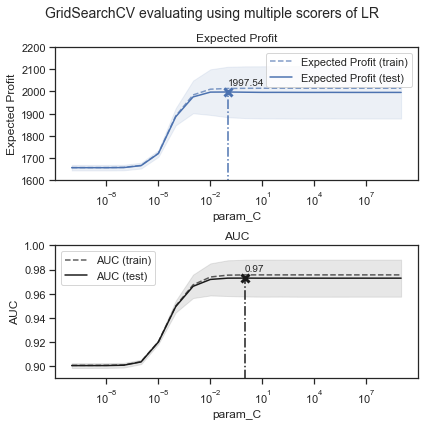

In [98]:
plot_grid_search_performance(
    lr_grid_search.cv_results_, 'param_C', 
    ylim_0=(1600, 2200),
    ylim_1=(0.89),
    xscale='log',
    classifier='LR',
)

We searched $C$ from $10^{-10}$ to $10^{9}$ and used the expected profit and AUC as scores for cross validation. As the result showed, the best AUC is 0.97 when $C=1$. It provides a basic score of model performance and AUC does not change a lot from $10^{-2}$. Meanwhile, the best expected profit is ￥1997.54 when $C=10^{-1}$. Because the expected profit is the primary metric that directly relates to the profit, $C=10^{-1}$ should be considered as the best choice.

Print the best hyperparams to choose.

In [99]:
lr_grid_search.best_params_, lr_grid_search.best_score_

({'C': 0.1}, 1997.5435992529017)

## Refit Model and Evaluation on the Test Set

save logistic regression final model as `joblib` file

In [100]:
# lr_final = lr_grid_search

In [101]:
# dump(lr_final, './final_model/lr_final_model.joblib')

use `load` funtion to load corresponding model directly

In [102]:
lr_final = load('./final_model/lr_final_model.joblib')

In [103]:
from sklearn.metrics import classification_report

preds = lr_final.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8384
           1       0.52      0.73      0.60       845

    accuracy                           0.91      9229
   macro avg       0.74      0.83      0.78      9229
weighted avg       0.93      0.91      0.92      9229



Define a plot function to visualize AUC

In [104]:
from sklearn import metrics
from itertools import cycle

def plot_auc(models):
    fig, ax = plt.subplots(figsize=(5, 5))
    
    model_keys = list(models.keys())
    
    marker = cycle(('-', ':', '--')) 
    for key in model_keys:
        preds_probs = models[key].predict_proba(X_test)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(y_test, preds_probs)
        roc_auc = metrics.auc(fpr, tpr)
        print('AUC for {} {:.3f}'.format(key, roc_auc))

        ax.plot(fpr, tpr, linestyle=next(marker), label='ROC curve area = {:.3f} ({})'.format(roc_auc, key))
        
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.0, 1.05)
    ax.grid()
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(
        'Receiver operating characteristic of ' + ', '.join(model_keys),
        fontsize=14,
    )
    ax.legend(loc="lower right")

AUC for LR 0.916


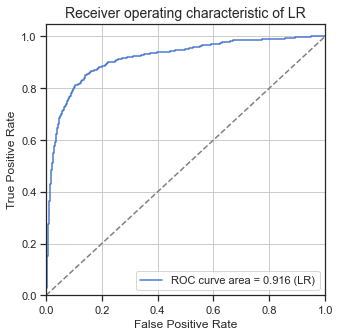

In [105]:
plot_auc({'LR': lr_final})

Define a plot function to visualize confusion matrix

In [106]:
from sklearn.metrics import plot_confusion_matrix

def plot_cm(model, classifier=''):
    disp = plot_confusion_matrix(
        model, X_test, y_test,
        display_labels=['Not Churn', 'Churn'],
        cmap='Blues',
    )
    classifier_str = ' of ' + classifier if classifier != '' else ''
    disp.ax_.set_title(
        'Confusion matrix' + classifier_str,
        fontsize=14,
    )

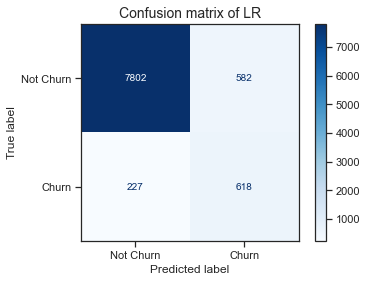

In [107]:
plot_cm(lr_final, 'LR')

In [108]:
preds = lr_final.predict(X_test)
print('The expected profit is {:.2f} at decision threshold 0.5'
      .format(profit_score(y_test, preds)))

The expected profit is 201.67 at decision threshold 0.5


# Random Forest<a class="anchor" id="random-forest"></a>

Random forest is an efficient and robust algorithm. It can handle high dimensional features and outliers very well and normally has better performance over logistic regression.

## Hyperparameter Tuning

There are three to five major hyperparameters to tune. It will be time-consuming to do a grid search of all combinations of hyperparameters. **Therefore, we used a greedy approach**, which selected a more important hyperparameter to tune first, and then selected a less important one to tune.

### 1. `n_estimator` tuning

Firstly, tune `n_estimators` which affects the whole model rather then several trees.

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [110]:
rf_params1 = {
    'n_estimators': range(10, 101, 10),
}

In [111]:
rf_grid_search1 = GridSearchCV(
    estimator=RandomForestClassifier(random_state=rdn_seed), 
    param_grid=rf_params1, 
    scoring=double_scoring,
    refit='The expected profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1,
    verbose=1,
)

Start searching (fitting) and use `dump` to save the model as `joblib` file in `final_model` folder.

<span style="color:red">[Computational Time Warning]: This searching (fitting) step may take a long time. To save time, you may just use `load` funtion to load corresponding model directly.</span>

In [112]:
# %%time
# rf_grid_search1.fit(X_train_res, y_train_res)

In [113]:
# dump(rf_grid_search1, './final_model/rf_grid_search1.joblib')

use `load` funtion to load corresponding model directly

In [114]:
rf_grid_search1 = load('./final_model/rf_grid_search1.joblib')

In [115]:
# rf_grid_search1.cv_results_

When param_n_estimators = 100.0,
we get the best Expected Profit = 2122.85

When param_n_estimators = 100.0,
we get the best AUC = 0.99



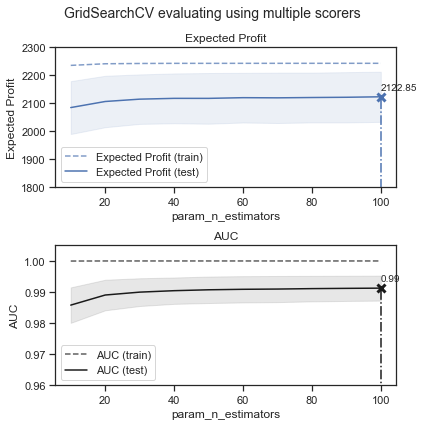

In [116]:
plot_grid_search_performance(
    rf_grid_search1.cv_results_, 'param_n_estimators',
    ylim_0=(1800, 2300),
    ylim_1=(0.96, 1.005),
)

Print the best hyperparams to choose.

In [117]:
rf_best_params1 = rf_grid_search1.best_params_
rf_grid_search1.best_params_, rf_grid_search1.best_score_

({'n_estimators': 100}, 2122.8522818101574)

### 2. `max_depth` tuning

Then tune `max_depth` which may just affects several trees

In [118]:
rf_params2 = {
    'max_depth': range(10,61,10),
}

In [119]:
rf_grid_search2 = GridSearchCV(
    estimator=RandomForestClassifier(**rf_best_params1, random_state=rdn_seed), 
    param_grid=rf_params2, 
    scoring=double_scoring,
    refit='The expected profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1, 
    verbose=1,)

Start searching (fitting) and use `dump` to save the model as `joblib` file in `final_model` folder.

<span style="color:red">[Computational Time Warning]: This searching (fitting) step may take a long time. To save time, you may just use `load` funtion to load corresponding model directly.</span>

In [120]:
# %%time
# rf_grid_search2.fit(X_train_res, y_train_res)

In [121]:
# dump(rf_grid_search2, './final_model/rf_grid_search2.joblib')

use `load` funtion to load corresponding model directly

In [122]:
rf_grid_search2 = load('./final_model/rf_grid_search2.joblib')

In [123]:
# rf_grid_search2.cv_results_

When param_max_depth = 50.0,
we get the best Expected Profit = 2121.65

When param_max_depth = 50.0,
we get the best AUC = 0.99



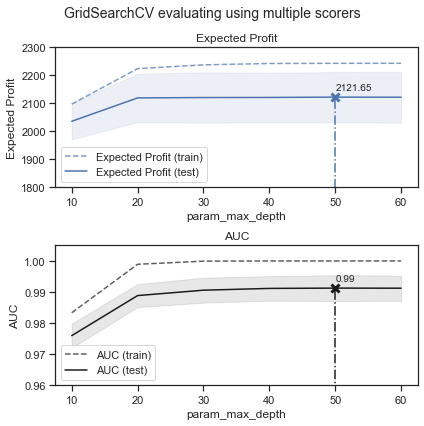

In [124]:
plot_grid_search_performance(rf_grid_search2.cv_results_, 'param_max_depth',
                        ylim_0=(1800, 2300),
                        ylim_1=(0.96, 1.005))

Print the best hyperparams to choose.

In [125]:
rf_best_params2 = rf_grid_search2.best_params_
rf_grid_search2.best_params_, rf_grid_search2.best_score_

({'max_depth': 50}, 2121.652401200814)

### 3. `max_features` tuning

Then tune `max_features` which may just affects several trees

In [126]:
rf_params3 = {
    'max_features': range(1, 20, 2),
}

In [127]:
rf_grid_search3 = GridSearchCV(
    estimator=RandomForestClassifier(
        **rf_best_params1, 
        **rf_best_params2, 
        random_state=rdn_seed,
    ),
    param_grid=rf_params3, 
    scoring=double_scoring,
    refit='The expected profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1, 
    verbose=1,
)

Start searching (fitting) and use `dump` to save the model as `joblib` file in `final_model` folder.

<span style="color:red">[Computational Time Warning]: This searching (fitting) step may take a long time. To save time, you may just use `load` funtion to load corresponding model directly.</span>

In [128]:
# %%time
# rf_grid_search3.fit(X_train_res, y_train_res)

In [129]:
# dump(rf_grid_search3, './final_model/rf_grid_search3.joblib')

use `load` funtion to load corresponding model directly

In [130]:
rf_grid_search3 = load('./final_model/rf_grid_search3.joblib')

In [131]:
# rf_grid_search3.cv_results_

When param_max_features = 3.0,
we get the best Expected Profit = 2126.58

When param_max_features = 5.0,
we get the best AUC = 0.99



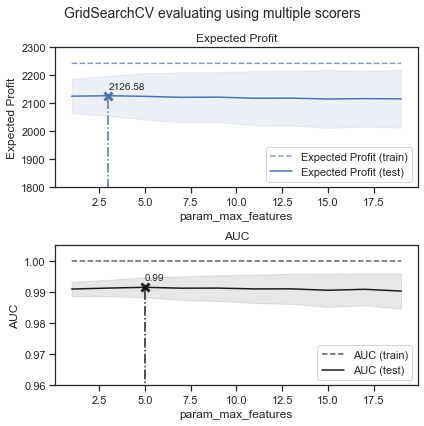

In [132]:
plot_grid_search_performance(
    rf_grid_search3.cv_results_, 'param_max_features',
    ylim_0=(1800, 2300),
    ylim_1=(0.96, 1.005),
)

Print the best hyperparams to choose.

In [133]:
rf_best_params3 = rf_grid_search3.best_params_
rf_grid_search3.best_params_, rf_grid_search3.best_score_

({'max_features': 3}, 2126.580619186123)

## Refit Model and Evaluation the Test Set

save final model as `joblib` file

In [134]:
# rf_final = rf_grid_search3

In [135]:
# dump(rf_final, './final_model/rf_final_model.joblib')

use `load` funtion to load corresponding model directly

In [136]:
rf_final = load('./final_model/rf_final_model.joblib')

In [137]:
from sklearn.metrics import classification_report

preds = rf_final.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8384
           1       0.62      0.71      0.66       845

    accuracy                           0.93      9229
   macro avg       0.80      0.83      0.81      9229
weighted avg       0.94      0.93      0.94      9229



AUC for RF 0.940


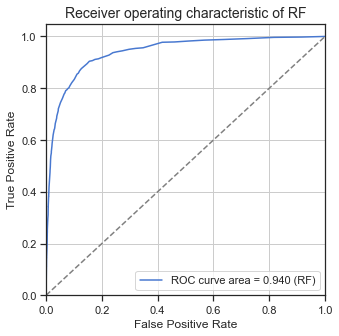

In [138]:
plot_auc({'RF': rf_final})

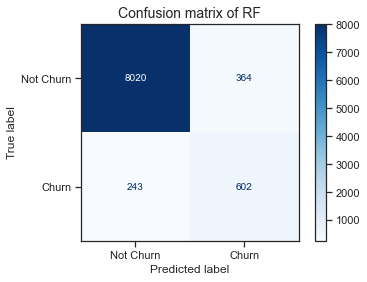

In [139]:
plot_cm(rf_final, 'RF')

In [140]:
preds = rf_final.predict(X_test)
print('The expected profit is {:.2f} at decision threshold 0.5'
      .format(profit_score(y_test, preds)))

The expected profit is 230.85 at decision threshold 0.5


## Feature Importance Analysis

Random forest uses average information gain for trees to calculate the importance of features. According to the result of the final model, the feature group related to outgoing and incoming calls in the last month, August, is the most important for classification. Meanwhile, the rates of change of values from July to August are also significant features.

In [141]:
importances = rf_final.best_estimator_.feature_importances_
col_names =  X_train_res.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,colName,value
0,0.042751,loc_og_t2m_mou_8
1,0.040500,loc_og_mou_8
2,0.039957,total_ic_mou_8
3,0.038771,loc_ic_t2m_mou_8
4,0.035072,total_rech_amt_8
5,0.033166,total_og_mou_8
6,0.031915,last_day_rech_amt_8
7,0.029828,roam_og_mou_8
8,0.028414,total_ic_mou_8over7
9,0.026554,roam_ic_mou_8


Text(0.5, 1.0, 'Random forest feature importances')

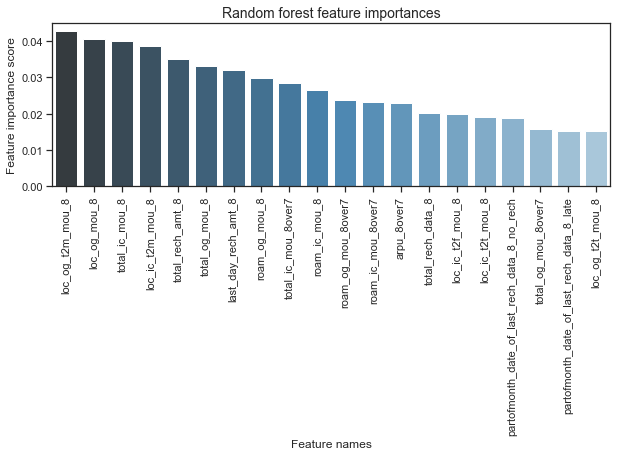

In [142]:
fig, ax = plt.subplots(figsize=(10, 3))

sns.barplot(y='colName', x='value', data=sorted_feature_importance[0:20], palette="Blues_r_d")
ax.set_ylabel('Feature importance score')
ax.set_xlabel('Feature names')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Random forest feature importances', fontsize=14)

# Support Vector Machine<a class="anchor" id="svm"></a>

Although support vector machine is a time-consuming algorithm with time complexity $O(n^{2})$, SVM still has its advantage. One significant advantage is the final decision function is determined by only a few support vectors, making it robust.


## Hyperparameter Tuning

### 1. `C` tuning

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [144]:
svm_params1 = {
    'C': list(np.power(10.0, np.arange(-1, 3))),
}

In [145]:
svm_grid_search1 = GridSearchCV(
    SVC(kernel='rbf', random_state=rdn_seed),
    param_grid=svm_params1, 
    scoring=double_scoring,
    refit='The expected profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1, 
    verbose=1
)

Start searching (fitting) and use `dump` to save the model as `joblib` file in `final_model` folder.

<span style="color:red">[Computational Time Warning]: This searching (fitting) step may take a long time. To save time, you may just use `load` funtion to load corresponding model directly.</span>

In [146]:
# %%time
# svm_grid_search1.fit(X_train_res, y_train_res)

In [147]:
# dump(svm_grid_search1, './final_model/svm_grid_search1.joblib')

use `load` funtion to load corresponding model directly

In [148]:
svm_grid_search1 = load('./final_model/svm_grid_search1.joblib')

In [149]:
# svm_grid_search1.cv_results_

When param_C = 10.0,
we get the best Expected Profit = 2121.11

When param_C = 10.0,
we get the best AUC = 0.99



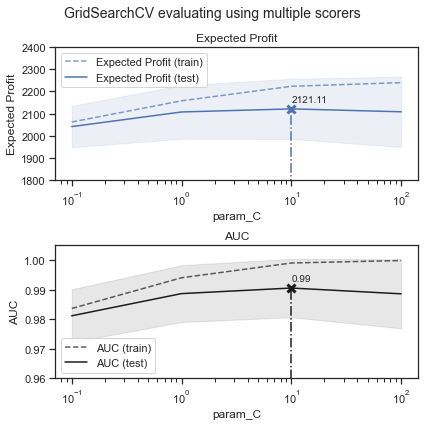

In [150]:
plot_grid_search_performance(
    svm_grid_search1.cv_results_, 'param_C',
    xscale='log',
    ylim_0=(1800, 2400),
    ylim_1=(0.96, 1.005),
)

Print the best hyperparams to choose.

In [151]:
svm_best_params1 = svm_grid_search1.best_params_
svm_grid_search1.best_params_, svm_grid_search1.best_score_

({'C': 10.0}, 2121.1138586407487)

### 2. `gamma` tuning

In [152]:
svm_params2 = {
    'gamma': list(np.power(10.0, np.arange(-4, 1))),
}

In [153]:
svm_grid_search2 = GridSearchCV(
    SVC(**svm_best_params1, kernel='rbf', random_state=rdn_seed),
    param_grid=svm_params2, 
    scoring=double_scoring,
    refit='The expected profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1, 
    verbose=1
)

Start searching (fitting) and use `dump` to save the model as `joblib` file in `final_model` folder.

<span style="color:red">[Computational Time Warning]: This searching (fitting) step may take a long time. To save time, you may just use `load` funtion to load corresponding model directly.</span>

In [154]:
# %%time
# svm_grid_search2.fit(X_train_res, y_train_res)

In [155]:
# dump(svm_grid_search2, './final_model/svm_grid_search2.joblib')

use `load` funtion to load corresponding model directly

In [156]:
svm_grid_search2 = load('./final_model/svm_grid_search2.joblib')

In [157]:
# svm_grid_search2.cv_results_

When param_gamma = 0.01,
we get the best Expected Profit = 2118.97

When param_gamma = 0.1,
we get the best AUC = 0.99



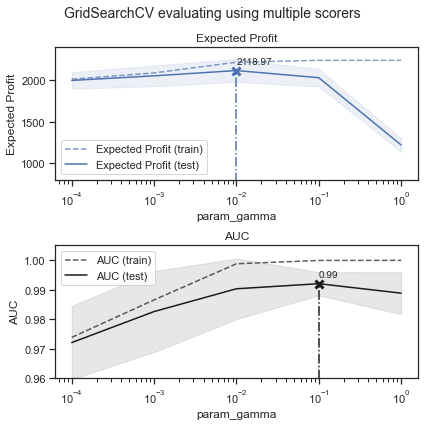

In [158]:
plot_grid_search_performance(
    svm_grid_search2.cv_results_, 'param_gamma',
    xscale='log',
    ylim_0=(800, 2400),
    ylim_1=(0.96, 1.005),
)

Print the best hyperparams to choose.

In [159]:
svm_best_params2 = svm_grid_search2.best_params_
svm_grid_search2.best_params_, svm_grid_search2.best_score_

({'gamma': 0.01}, 2118.9737095280834)

## Refit Model and Evaluation the Test Set

Use best hyperparameter we chose previously for refitting.

In [160]:
from sklearn.svm import SVC
svm_final = SVC(**svm_best_params1, **svm_best_params2, kernel='rbf', probability=True, random_state=rdn_seed)

Start searching (fitting) and use `dump` to save the model as `joblib` file in `final_model` folder.

<span style="color:red">[Computational Time Warning]: This searching (fitting) step may take a long time. To save time, you may just use `load` funtion to load corresponding model directly.</span>

In [161]:
# %%time
# svm_final.fit(X_train_res, y_train_res)

In [162]:
# dump(svm_final, './final_model/svm_final.joblib')

use `load` funtion to load corresponding model directly

In [163]:
svm_final = load('./final_model/svm_final.joblib')

In [164]:
from sklearn.metrics import classification_report

preds = svm_final.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8384
           1       0.61      0.67      0.64       845

    accuracy                           0.93      9229
   macro avg       0.79      0.81      0.80      9229
weighted avg       0.93      0.93      0.93      9229



AUC for SVM 0.917


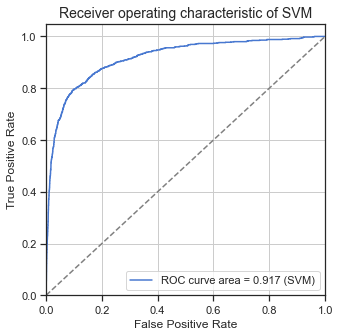

In [165]:
plot_auc({'SVM': svm_final})

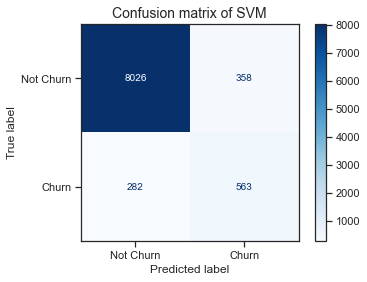

In [166]:
plot_cm(svm_final, 'SVM')

In [167]:
print('The expected profit is {:.2f} at decision threshold 0.5'
      .format(profit_score(y_test, preds)))

The expected profit is 212.92 at decision threshold 0.5


# Compare Models on The Test Set<a class="anchor" id="compare-models"></a>

## AUC<a class="anchor" id="auc"></a>

AUC for LR 0.916
AUC for RF 0.940
AUC for SVM 0.917


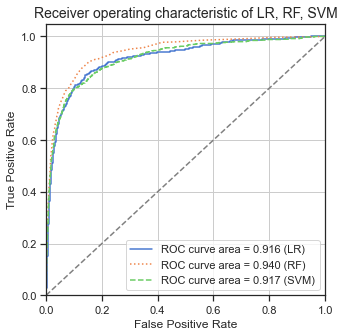

In [168]:
plot_auc({'LR': lr_final, 'RF': rf_final, 'SVM': svm_final})

## Profit Curve<a class="anchor" id="profit-curve"></a>

Define plot function for visualize profit curve

In [169]:
from sklearn import metrics
from itertools import cycle

def plot_profit(models, annotate=False):
    fig, ax = plt.subplots(figsize=(5, 5))
    
    model_keys = list(models.keys())
    
    all_pos_profit = ((y_test.sum() * TP_BENEFIT + 
                       (y_test == 0).sum() * FP_COST) / 
                      len(y_test))
    ax.plot([0, 1], [0, all_pos_profit], color='gray', linestyle='--', label='Random')
    ylim_list = list(ax.get_ylim())
    
    marker = cycle(('-', ':', '--')) 
    color = cycle(('blue', 'orange', 'green'))
    for key in model_keys:
        preds_probs = models[key].predict_proba(X_test)[:, 1]
        df_dict = {'actual': list(y_test), 'preds_probs': list(preds_probs)}
        df = pd.DataFrame(df_dict)
        df['rank'] = pd.qcut(
            df['preds_probs'].rank(method='first', ascending=False), 
            100, labels=False,
        )
        profits = [
            (df.loc[df['rank'] < rank, 'actual'].sum() * TP_BENEFIT + 
             (df.loc[df['rank'] < rank, 'actual'] == 0).sum() * FP_COST +
             (df.loc[df['rank'] >= rank, 'actual'] == 0).sum() * TN_BENEFIT +
             df.loc[df['rank'] >= rank, 'actual'].sum() * FN_COST) / len(y_test)
            for rank in range(101)
        ]

        line, = ax.plot(
            np.arange(.00, 1.01, .01), profits, 
            linestyle=next(marker),
            label=key,
        )
        
        # Plot a dotted vertical line at the best score for that scorer marked by x
        
        percentile = df.loc[df['preds_probs'] > 0.5, 'rank'].max() / 100 + 0.01
        profit = (
            df.loc[df['preds_probs'] > 0.5, 'actual'].sum() * TP_BENEFIT + 
            (df.loc[df['preds_probs'] > 0.5, 'actual'] == 0).sum() * FP_COST +
            (df.loc[df['preds_probs'] <= 0.5, 'actual'] == 0).sum() * TN_BENEFIT +
            df.loc[df['preds_probs'] <= 0.5, 'actual'].sum() * FN_COST
        )
        profit /= len(y_test)
        
        if annotate:
            ax.plot(
                [percentile, ] * 2, 
                [ylim_list[0] - (ylim_list[1] - ylim_list[0]), profit],
                linestyle='-.', marker='x', markeredgewidth=3, ms=8,
                color=line.get_color(),
            )
        
        # Annotate
#         ax.annotate(
#             '{:.2f}'.format(profit), 
#             (percentile, profit + 0.1),
#         )
        
        print('{} gives {:.2f} expected profit at threshold 0.5'.format(key, profit))
        
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(ylim_list[0])
    ax.grid()
    ax.set_xlabel('Percentage of test instances (decreasing by score)')
    ax.set_ylabel('Expected profit per customers')
    ax.set_title(
        'Expected profit of ' + ', '.join(model_keys),
        fontsize=14,
    )
    ax.legend(loc='best')

LR gives 201.67 expected profit at threshold 0.5
RF gives 230.85 expected profit at threshold 0.5
SVM gives 211.11 expected profit at threshold 0.5


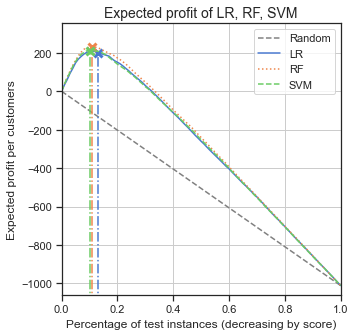

In [170]:
plot_profit(
    {'LR': lr_final, 'RF': rf_final, 'SVM': svm_final},
    annotate=True,
)

## Lift Curve<a class="anchor" id="lift-curve"></a>

Define plot function for visualize lift curve

In [171]:
from sklearn import metrics
from itertools import cycle

def plot_lift(models, annotate=False):
    fig, ax = plt.subplots(figsize=(5, 5))
    
    model_keys = list(models.keys())
    
    ax.plot([0, 1], [1, 1], color='gray', linestyle='--', label='Random')
    
    marker = cycle(('-', ':', '--')) 
    color = cycle(('blue', 'orange', 'green'))
    for key in model_keys:
        preds_probs = models[key].predict_proba(X_test)[:, 1]
        df_dict = {'actual': list(y_test), 'preds_probs': list(preds_probs)}
        df = pd.DataFrame(df_dict)
        df['rank'] = pd.qcut(
            df['preds_probs'].rank(method='first', ascending=False), 
            100, labels=False,
        )
        pos_pct = [df.loc[df['rank'] <= rank, 'actual'].sum() / ((rank + 1) / 100)
                   for rank in range(100)] / y_test.sum()

        line, = ax.plot(
            np.arange(.01, 1.01, .01), pos_pct, 
            linestyle=next(marker),
            label=key,
        )
        
        random_base = len(df[df['preds_probs'] > 0.5]) / len(df)
        percentile = df.loc[df['preds_probs'] > 0.5, 'rank'].max() / 100 + 0.01
        lift = (df.loc[df['preds_probs'] > 0.5, 'actual'].sum() / 
                y_test.sum() / 
                random_base)
        
        # Plot a dotted vertical line at the best score for that scorer marked by x
        if annotate:
            ax.plot(
                [percentile, ] * 2, [-1, lift],
                linestyle='-.', marker='x', markeredgewidth=3, ms=8,
                color=line.get_color(),
            )

            # Annotate
            ax.annotate(
                '{:.2f}'.format(lift), 
                (percentile, lift + 0.1),
            )
        
        print('{} gives {:.2f} lift at threshold 0.5'.format(key, lift))   

    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.0)
    ax.grid()
    ax.set_xlabel('Percentage of test instances (decreasing by score)')
    ax.set_ylabel('Lift')
    ax.set_title(
        'Lift of ' + ', '.join(model_keys),
        fontsize=14,
    )
    ax.legend(loc='best')

LR gives 5.62 lift at threshold 0.5
RF gives 6.81 lift at threshold 0.5
SVM gives 7.04 lift at threshold 0.5


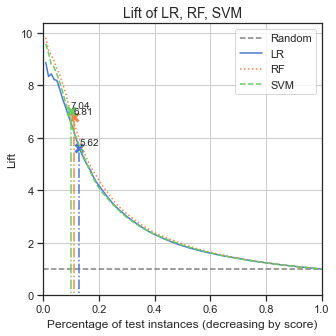

In [172]:
plot_lift(
    {'LR': lr_final, 'RF': rf_final, 'SVM': svm_final},
    annotate=True
)